In [13]:
import datetime
import numpy as np
import pandas as pd
import random
import glob
from scipy.signal import find_peaks

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator
import matplotlib.backends.backend_pdf as p 


%matplotlib inline

import vasu
import vasu_strategy as strategy

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


In [14]:
def get_trough_indices(dataframe):
    low_price_seq = dataframe['Low Price'].values
    trough_indices = get_troughs(low_price_seq)
    return trough_indices    

def get_peak_indices(dataframe):
    high_price_seq = dataframe['High Price'].values
    peak_indices = get_peaks(high_price_seq)
    return peak_indices    

def get_peaks(price_seq):
    threshold_val = np.mean(price_seq)*0.01
    peaks,peaks_properties = find_peaks(price_seq,distance=4,prominence=5)
    return peaks

def get_troughs(price_seq):
    price_seq_inv = price_seq*-1
    threshold_val = np.mean(price_seq)*0.01
    troughs,troughs_properties = find_peaks(price_seq_inv,distance=4,prominence=5)
    return troughs

def read_data(price_file):
    price_data = pd.read_csv(price_file, index_col = 0, parse_dates = True,
                             usecols = [u'Date',u'Open Price', u'High Price', u'Low Price', u'Close Price'],
                             dtype= {u'Open Price':np.float64,u'High Price':np.float64,
                                     u'Low Price':np.float64,u'Close Price':np.float64}).sort_index()
    return price_data

#--------------------------High and Lows----------------------------------------------

def get_momentum_high_df(dataframe):
    peak_indices = get_peak_indices(dataframe)
    high_data = pd.DataFrame(data=[],index = dataframe.index[peak_indices],columns=['high_type'])
    high_data['high_type'] = 'momentum high'
    return high_data

def get_momentum_low_df(dataframe):
    trough_indices = get_trough_indices(dataframe)
    low_data = pd.DataFrame(data=[],index = dataframe.index[trough_indices],columns=['low_type'])
    low_data['low_type'] = 'momentum low'
    return low_data

#----special candles---------------------------------------
def is_hammer(row):
    candle_body = abs(row['Open Price'] - row['Close Price'])
    candle_length = row['High Price'] - row['Low Price']
    if (row['Close Price'] > row['Open Price']):
        candle_upper_shadow = row['High Price'] - row['Close Price']
    else:
        candle_upper_shadow = row['High Price'] - row['Open Price']
        
    if candle_body <= 0.3*candle_length and candle_upper_shadow <= 0.15*candle_length:
        return True
    else:
        return False

def is_inverse_hammer(row):
    candle_body = abs(row['Open Price'] - row['Close Price'])
    candle_length = row['High Price'] - row['Low Price']
    if (row['Close Price'] > row['Open Price']):
        candle_upper_shadow = row['High Price'] - row['Close Price']
    else:
        candle_upper_shadow = row['High Price'] - row['Open Price']
        
    if candle_body <= 0.3*candle_length and candle_upper_shadow > 0.65*candle_length:
        return True
    else:
        return False


file running:
 1 year data\balrampurchini.csv


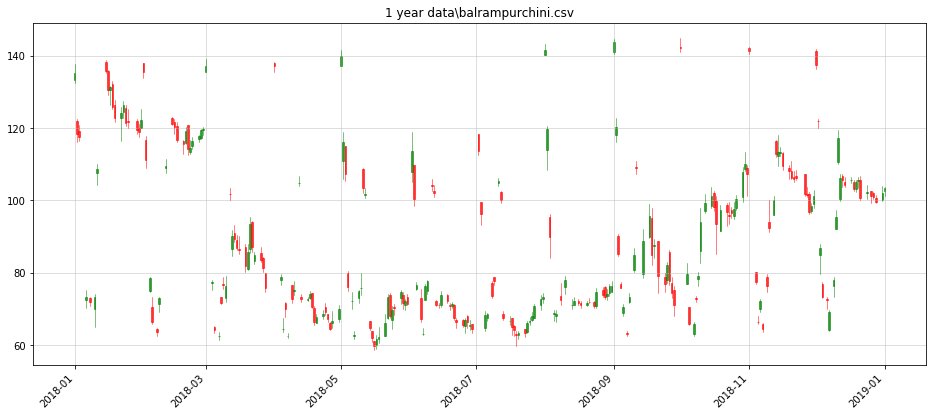

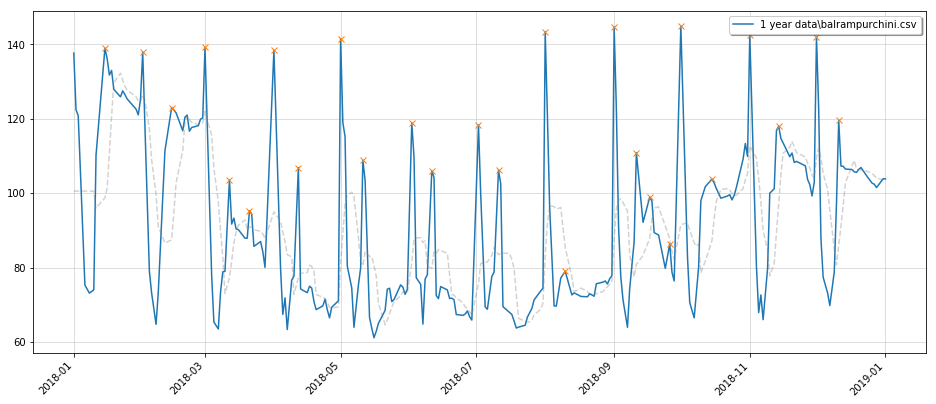


High points dates:
 Date
2018-01-15    138.95
2018-02-01    137.95
2018-02-14    123.00
2018-03-01    139.20
2018-03-12    103.55
2018-03-21     95.30
2018-04-01    138.40
2018-04-12    106.90
2018-05-01    141.55
2018-05-11    108.85
2018-06-02    118.90
2018-06-11    106.00
2018-07-02    118.35
2018-07-11    106.20
2018-08-01    143.40
2018-08-10     79.00
2018-09-01    144.65
2018-09-11    110.90
2018-09-17     98.95
2018-09-26     86.40
2018-10-01    144.90
2018-10-15    103.80
2018-11-01    142.50
2018-11-14    118.00
2018-12-01    142.00
2018-12-11    119.60
dtype: float64


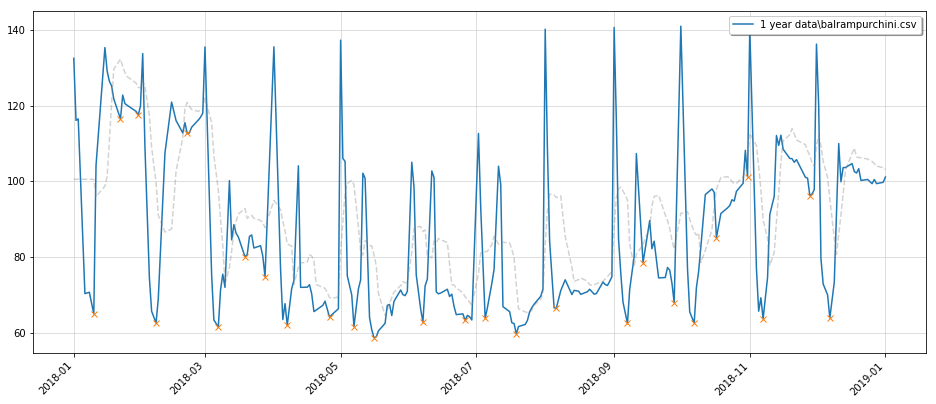


Low points dates:
 Date
2018-01-15    135.35
2018-02-01    133.75
2018-02-14    120.95
2018-03-01    135.50
2018-03-12    100.20
2018-03-21     85.45
2018-04-01    135.55
2018-04-12    104.10
2018-05-01    137.30
2018-05-11    102.15
2018-06-02    105.05
2018-06-11    102.75
2018-07-02    112.65
2018-07-11    104.00
2018-08-01    140.20
2018-08-10     74.00
2018-09-01    140.65
2018-09-11    107.35
2018-09-17     89.65
2018-09-26     76.55
2018-10-01    141.00
2018-10-15     98.00
2018-11-01    140.40
2018-11-14    109.50
2018-12-01    136.25
2018-12-11    110.00
dtype: float64


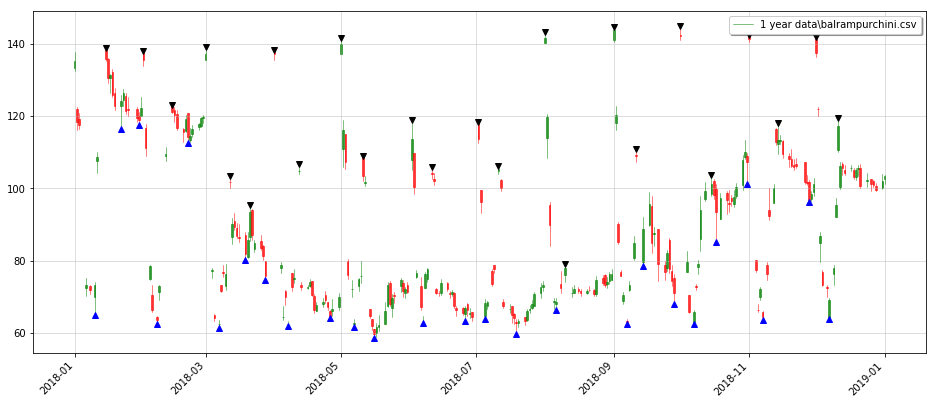

None
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      133.45      137.65     132.50       135.30    0.000000   
2018-01-02      122.00      122.45     116.10       118.40    0.000000   
2018-01-03      119.20      120.80     116.50       117.45    0.000000   
2018-01-06       72.50       75.30      70.35        73.15    0.000000   
2018-01-08       73.00       73.15      70.70        71.85    0.000000   
2018-01-10       70.10       74.00      65.00        73.35    0.000000   
2018-01-11      107.70      110.20     104.20       108.65    0.000000   
2018-01-15      138.40      138.95     135.35       135.85    0.000000   
2018-01-16      135.80      136.20     129.15       130.55   -0.083141   
2018-01-17      130.50      131.75     126.45       131.25   -0.083141   
2018-01-18      132.25      133.00     125.25       125.95   -0.083141   
2018-01-19      126.50      127.9


lower low data:
            related low date   low_type  resistance  resistance_dilution
Date                                                                   
2018-02-07       2018-01-10  lower_low       64.75                  204
2018-02-02       2018-01-22  lower_low      117.95                   16
2018-02-02       2018-01-30  lower_low      117.95                   16
2018-05-15       2018-02-07  lower_low       63.75                  150
2018-03-04       2018-02-21  lower_low       77.95                   96
2018-05-16       2018-03-07  lower_low       61.15                  157
2018-03-28       2018-03-19  lower_low       80.05                   78
2018-04-05       2018-03-28  lower_low       67.40                  153
2018-05-15       2018-04-07  lower_low       63.75                  150
2018-05-07       2018-04-26  lower_low       63.95                  155
2018-05-16       2018-05-07  lower_low       61.15                  157
2018-07-19       2018-06-26  lower_low       6

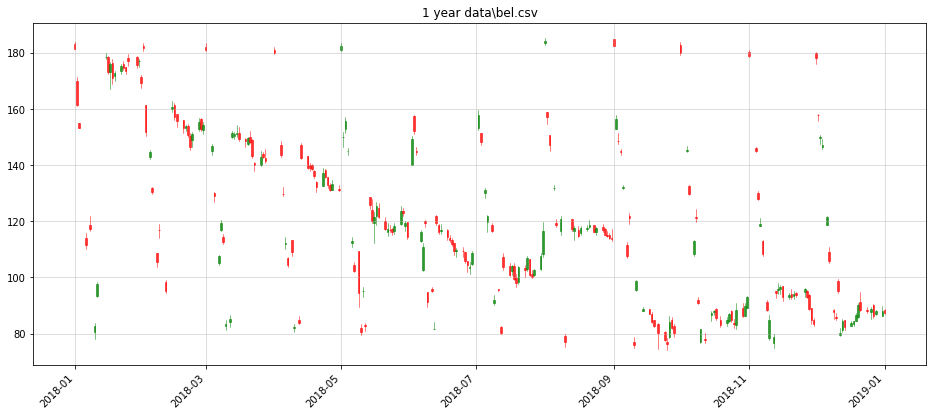

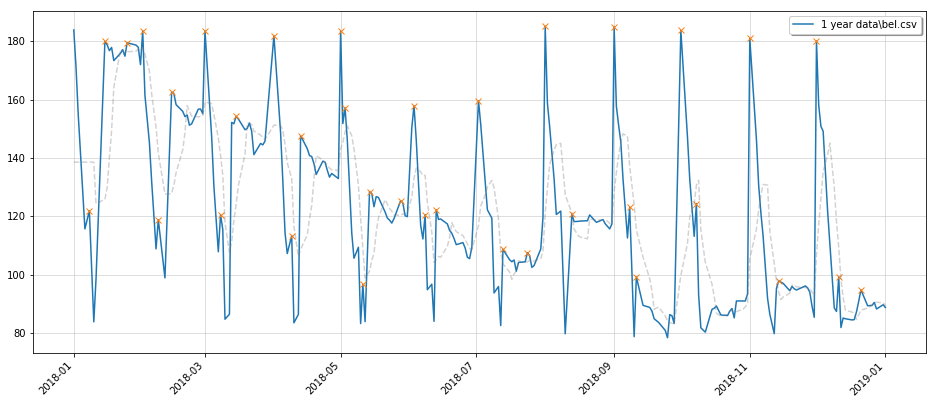


High points dates:
 Date
2018-01-08    121.90
2018-01-15    180.00
2018-01-25    179.50
2018-02-01    183.65
2018-02-08    118.85
2018-02-14    162.65
2018-03-01    183.60
2018-03-08    120.55
2018-03-15    154.30
2018-04-01    181.90
2018-04-09    113.40
2018-04-13    147.70
2018-05-01    183.50
2018-05-03    157.20
2018-05-11     96.70
2018-05-14    128.50
2018-05-28    125.40
2018-06-03    157.95
2018-06-08    120.60
2018-06-13    122.25
2018-07-02    159.60
2018-07-13    108.70
2018-07-24    107.55
2018-08-01    185.20
2018-08-13    120.70
2018-09-01    185.00
2018-09-08    123.10
2018-09-11     99.25
2018-10-01    183.75
2018-10-08    124.40
2018-11-01    181.00
2018-11-14     97.95
2018-12-01    180.10
2018-12-11     99.30
2018-12-21     94.80
dtype: float64


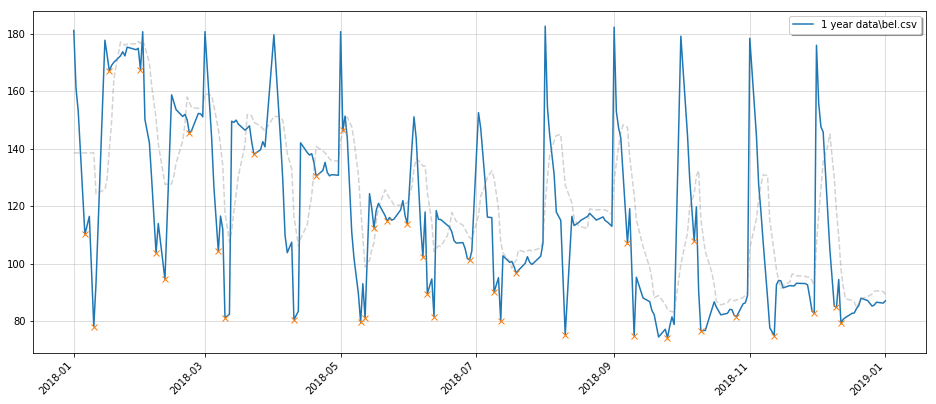


Low points dates:
 Date
2018-01-08    116.50
2018-01-15    177.80
2018-01-25    175.40
2018-02-01    180.75
2018-02-08    114.00
2018-02-14    158.80
2018-03-01    180.80
2018-03-08    116.60
2018-03-15    150.00
2018-04-01    179.70
2018-04-09    107.50
2018-04-13    142.10
2018-05-01    180.80
2018-05-03    151.40
2018-05-11     93.05
2018-05-14    124.40
2018-05-28    118.75
2018-06-03    151.15
2018-06-08    118.00
2018-06-13    118.50
2018-07-02    152.60
2018-07-13    102.75
2018-07-24    102.45
2018-08-01    182.70
2018-08-13    116.50
2018-09-01    182.35
2018-09-08    119.15
2018-09-11     95.30
2018-10-01    179.20
2018-10-08    119.80
2018-11-01    178.50
2018-11-14     94.20
2018-12-01    176.05
2018-12-11     94.50
2018-12-21     88.00
dtype: float64


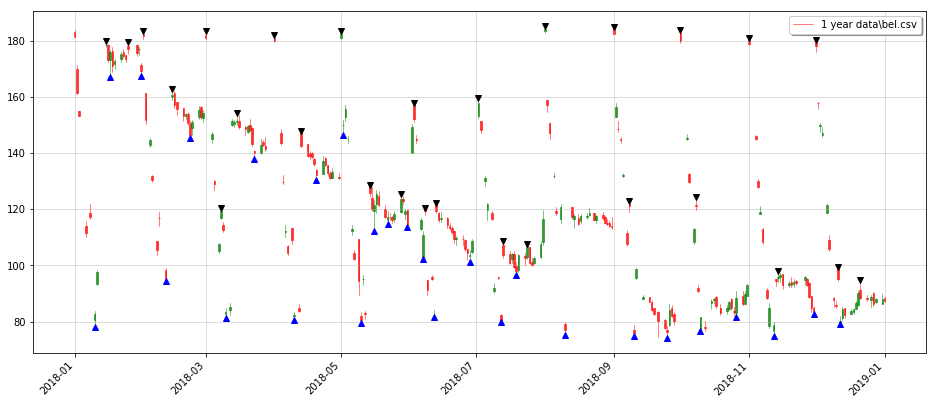

None
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      183.00      183.90     181.20       181.45    0.000000   
2018-01-02      170.00      171.20     161.10       161.55    0.000000   
2018-01-03      154.85      154.95     153.10       153.30    0.000000   
2018-01-06      114.00      115.70     110.20       111.40    0.000000   
2018-01-08      118.70      121.90     116.50       117.10    0.000000   
2018-01-10       80.55       83.85      78.10        82.70    0.000000   
2018-01-11       93.35       98.50      93.20        97.50    0.000000   
2018-01-15      178.50      180.00     177.80       178.60    0.000000   
2018-01-16      178.50      178.80     172.60       173.20   -0.062419   
2018-01-17      173.00      176.80     167.00       176.05   -0.062419   
2018-01-18      176.20      177.90     169.05       171.10   -0.062419   
2018-01-19      171.75      173.4


higer high data:
            related high date    high_type
Date                                     
2018-02-01        2018-01-15  higher_high
2018-02-01        2018-01-25  higher_high

lower low data:
            related low date   low_type  resistance  resistance_dilution
Date                                                                   
2018-08-10       2018-01-10  lower_low       79.75                   91
2018-02-02       2018-01-17  lower_low      161.50                    8
2018-02-02       2018-01-31  lower_low      161.50                    8
2018-03-10       2018-02-11  lower_low       84.75                  174
2018-03-05       2018-02-22  lower_low      130.45                   53
2018-05-10       2018-03-10  lower_low       83.25                  144
2018-04-05       2018-03-23  lower_low      132.30                   34
2018-07-12       2018-04-10  lower_low       82.55                  104
2018-05-06       2018-04-20  lower_low      114.35                   64
201

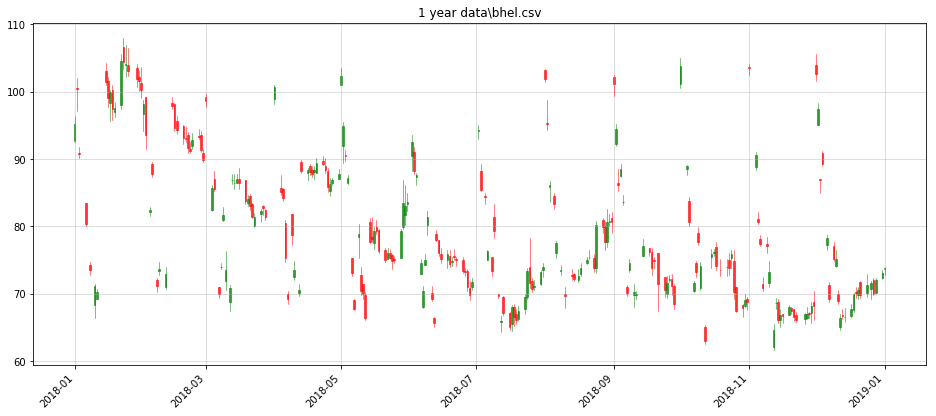

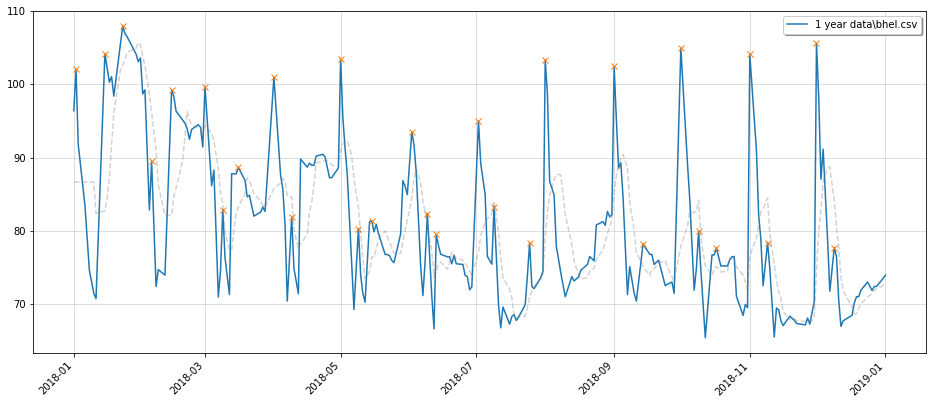


High points dates:
 Date
2018-01-02    102.05
2018-01-15    104.20
2018-01-23    107.95
2018-02-05     89.50
2018-02-14     99.25
2018-03-01     99.70
2018-03-09     82.90
2018-03-16     88.65
2018-04-01    101.00
2018-04-09     81.90
2018-05-01    103.50
2018-05-09     80.30
2018-05-15     81.40
2018-06-02     93.50
2018-06-09     82.35
2018-06-13     79.50
2018-07-02     95.00
2018-07-09     83.30
2018-07-25     78.35
2018-08-01    103.35
2018-09-01    102.45
2018-09-14     78.20
2018-10-01    104.95
2018-10-09     79.95
2018-10-17     77.65
2018-11-01    104.10
2018-11-09     78.40
2018-12-01    105.60
2018-12-09     77.70
dtype: float64


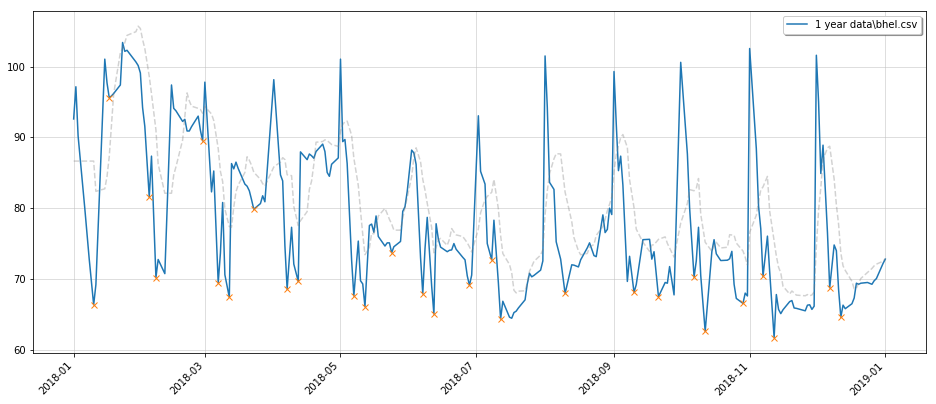


Low points dates:
 Date
2018-01-02     97.15
2018-01-15    101.05
2018-01-23    103.40
2018-02-05     87.35
2018-02-14     97.40
2018-03-01     97.80
2018-03-09     80.80
2018-03-16     85.60
2018-04-01     98.15
2018-04-09     77.30
2018-05-01    101.05
2018-05-09     75.35
2018-05-15     77.75
2018-06-02     88.20
2018-06-09     78.70
2018-06-13     77.80
2018-07-02     93.05
2018-07-09     78.30
2018-07-25     70.80
2018-08-01    101.50
2018-09-01     99.30
2018-09-14     75.55
2018-10-01    100.60
2018-10-09     77.30
2018-10-17     73.55
2018-11-01    102.55
2018-11-09     76.05
2018-12-01    101.60
2018-12-09     74.80
dtype: float64


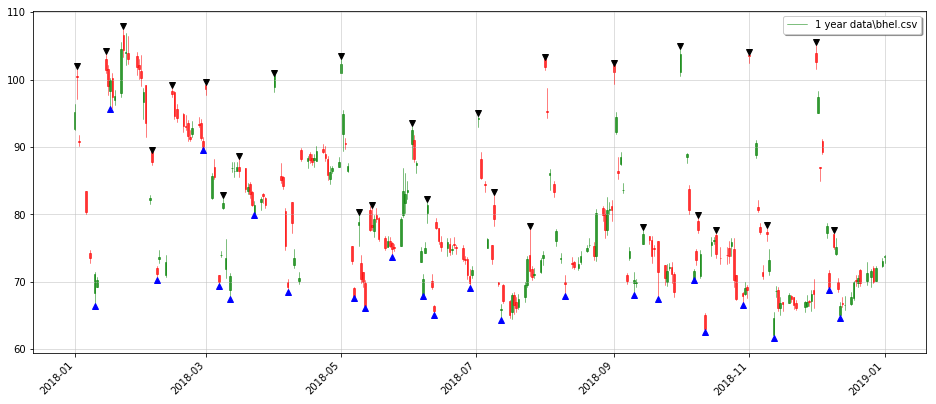

None
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01       92.65       96.40      92.60        95.15    0.000000   
2018-01-02      100.50      102.05      97.15       100.35    0.000000   
2018-01-03       90.85       91.80      90.20        90.70    0.344079   
2018-01-06       83.55       83.55      80.00        80.35    0.344079   
2018-01-08       74.30       74.65      72.80        73.55    0.344079   
2018-01-10       68.40       71.45      66.35        71.10    0.344079   
2018-01-11       69.20       70.75      69.20        70.20    0.344079   
2018-01-15      103.00      104.20     101.05       101.45    0.344079   
2018-01-16      101.60      102.20      97.70        99.00    0.558599   
2018-01-17       98.30      100.30      95.60        99.90    0.558599   
2018-01-18      100.30      101.05      95.85        97.45    0.558599   
2018-01-19       97.00       98.4


lower low data:
            related low date   low_type  resistance  resistance_dilution
Date                                                                   
2018-06-12       2018-01-10  lower_low       66.60                  126
2018-02-02       2018-01-17  lower_low       99.25                    7
2018-03-07       2018-02-07  lower_low       70.95                  147
2018-03-04       2018-02-28  lower_low       86.15                   37
2018-04-07       2018-03-07  lower_low       70.40                  133
2018-05-12       2018-03-12  lower_low       70.25                  113
2018-04-06       2018-03-23  lower_low       80.90                   43
2018-05-07       2018-04-07  lower_low       69.25                  129
2018-05-12       2018-05-07  lower_low       70.25                  113
2018-06-12       2018-05-12  lower_low       66.60                  126
2018-06-07       2018-05-24  lower_low       71.15                   87
2018-06-12       2018-06-07  lower_low       6

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:198: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



stock trend is : bearish and moving averages are trend is : -0.468520
events happened:
       candle type   event_ts      event_type
0          pinbar 2019-01-01  special candle
1  bullish pinbar 2019-01-01  special candle
---------------------------------------------------next data-----------------------------------------------------------

file running:
 1 year data\boi.csv


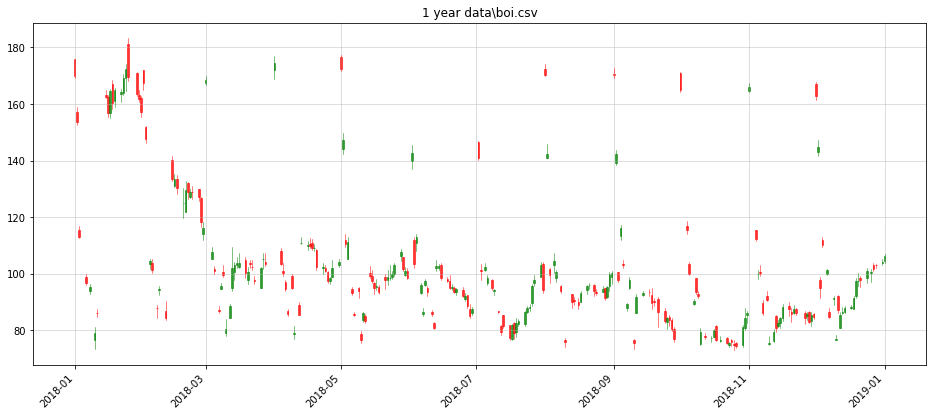

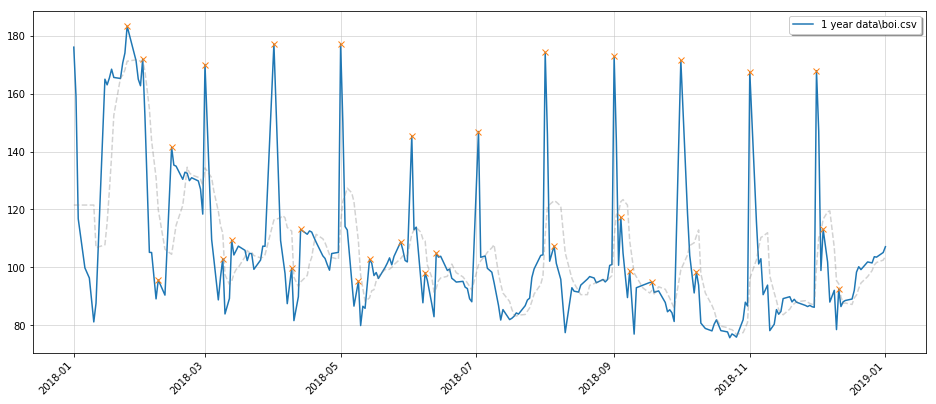


High points dates:
 Date
2018-01-25    183.25
2018-02-01    171.95
2018-02-08     95.70
2018-02-14    141.45
2018-03-01    170.00
2018-03-09    103.00
2018-03-13    109.35
2018-04-01    177.10
2018-04-09     99.80
2018-04-13    113.10
2018-05-01    177.15
2018-05-09     95.20
2018-05-14    102.75
2018-05-28    108.80
2018-06-02    145.45
2018-06-08     98.20
2018-06-13    104.90
2018-07-02    146.90
2018-08-01    174.25
2018-08-05    107.40
2018-09-01    172.80
2018-09-04    117.25
2018-09-08     98.80
2018-09-18     94.95
2018-10-01    171.40
2018-10-08     98.40
2018-11-01    167.50
2018-12-01    167.90
2018-12-04    113.15
2018-12-11     92.40
dtype: float64


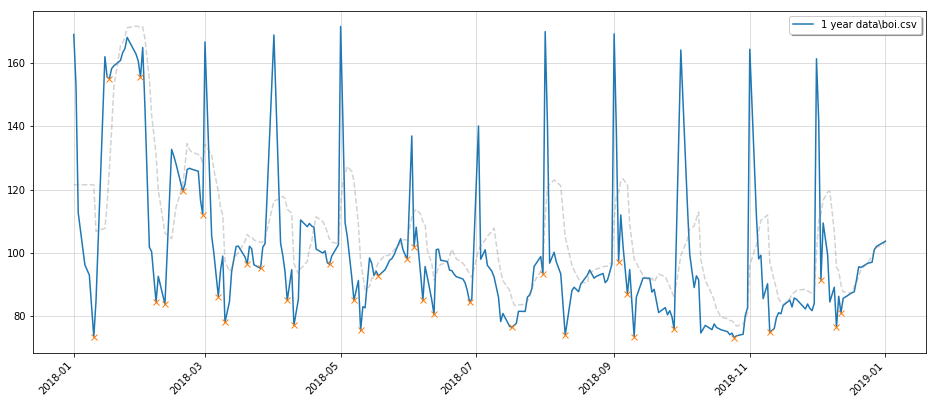


Low points dates:
 Date
2018-01-25    168.10
2018-02-01    164.90
2018-02-08     92.60
2018-02-14    132.70
2018-03-01    166.65
2018-03-09     99.00
2018-03-13     94.10
2018-04-01    168.85
2018-04-09     94.70
2018-04-13    110.40
2018-05-01    171.55
2018-05-09     91.30
2018-05-14     98.40
2018-05-28    104.50
2018-06-02    136.95
2018-06-08     95.70
2018-06-13    101.00
2018-07-02    140.10
2018-08-01    169.90
2018-08-05    100.20
2018-09-01    169.20
2018-09-04    112.00
2018-09-08     94.75
2018-09-18     87.60
2018-10-01    164.10
2018-10-08     92.75
2018-11-01    164.35
2018-12-01    161.35
2018-12-04    109.45
2018-12-11     86.30
dtype: float64


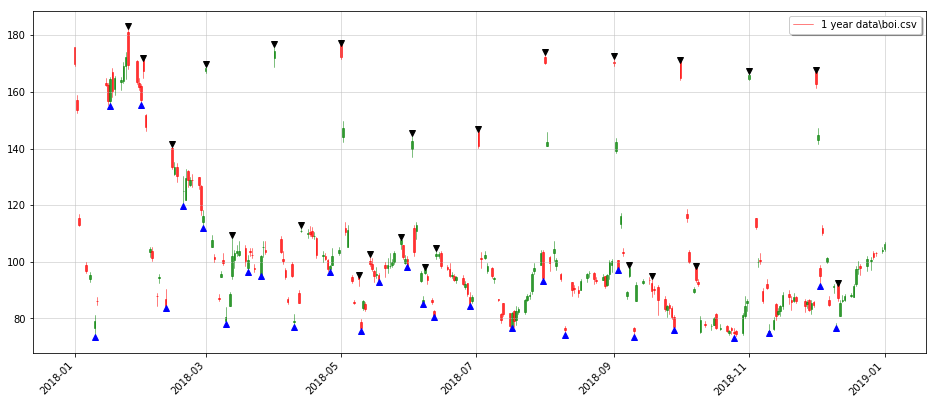

None
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      176.00      176.00     169.00       169.90    0.000000   
2018-01-02      157.00      158.95     152.75       153.50    0.000000   
2018-01-03      115.55      116.80     112.65       113.15    0.000000   
2018-01-06       99.00       99.85      96.20        96.70    0.000000   
2018-01-08       94.00       96.35      93.00        95.35    0.000000   
2018-01-10       76.70       81.20      73.45        79.15    0.000000   
2018-01-11       86.10       87.65      84.90        86.05    0.000000   
2018-01-15      163.10      164.95     162.00       162.40    0.000000   
2018-01-16      162.35      163.00     155.55       156.90    0.000000   
2018-01-17      156.90      165.35     155.00       164.70    0.000000   
2018-01-18      166.95      168.40     158.20       160.50    0.000000   
2018-01-19      161.20      165.5


higer high data:
            related high date    high_type
Date                                     
2018-04-01        2018-02-01  higher_high
2018-03-01        2018-02-14  higher_high

lower low data:
            related low date   low_type  resistance  resistance_dilution
Date                                                                   
2018-02-02       2018-01-17  lower_low      152.15                    8
2018-02-02       2018-01-31  lower_low      152.15                    8
2018-03-10       2018-02-11  lower_low       83.95                  168
2018-02-27       2018-02-19  lower_low      127.00                   14
2018-03-04       2018-02-28  lower_low      109.60                   23
2018-05-10       2018-03-10  lower_low       79.95                  143
2018-04-06       2018-03-20  lower_low       97.90                   65
2018-04-06       2018-03-26  lower_low       97.90                   65
2018-05-10       2018-04-10  lower_low       79.95                  143
201

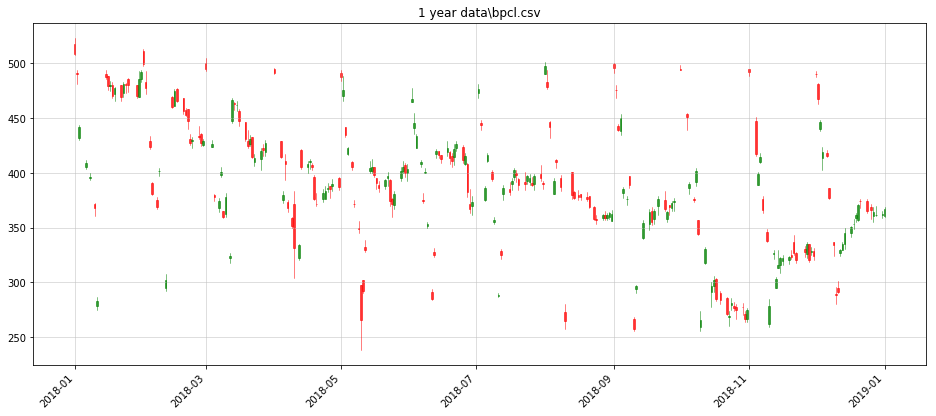

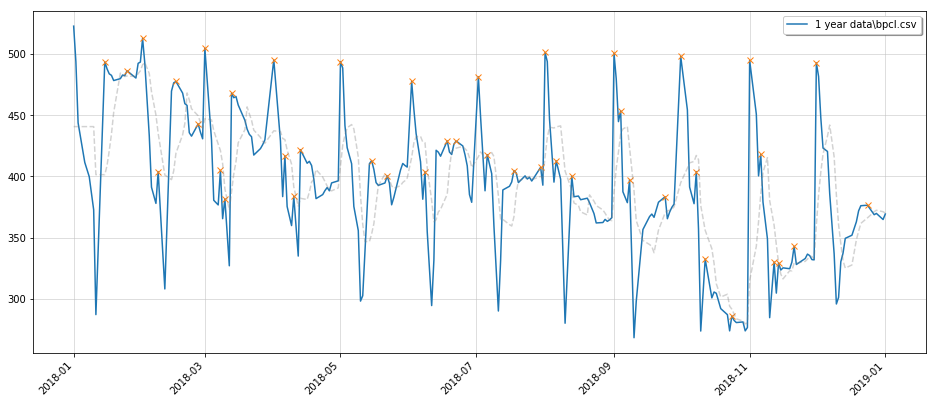


High points dates:
 Date
2018-01-15    493.90
2018-01-25    486.50
2018-02-01    512.95
2018-02-08    404.00
2018-02-16    477.75
2018-02-26    443.00
2018-03-01    504.90
2018-03-08    405.00
2018-03-10    381.80
2018-03-13    468.40
2018-04-01    495.50
2018-04-06    417.05
2018-04-10    383.80
2018-04-13    421.95
2018-05-01    494.00
2018-05-15    413.00
2018-05-22    400.45
2018-06-02    477.90
2018-06-08    404.00
2018-06-18    429.15
2018-06-22    429.00
2018-07-02    481.60
2018-07-06    417.85
2018-07-18    404.85
2018-07-30    407.50
2018-08-01    501.50
2018-08-06    412.80
2018-08-13    400.40
2018-09-01    500.75
2018-09-04    453.85
2018-09-08    397.50
2018-09-24    383.45
2018-10-01    498.20
2018-10-08    404.00
2018-10-12    332.50
2018-10-24    286.00
2018-11-01    495.00
2018-11-06    418.00
2018-11-12    330.00
2018-11-14    329.40
2018-11-21    342.85
2018-12-01    493.00
2018-12-24    376.50
dtype: float64


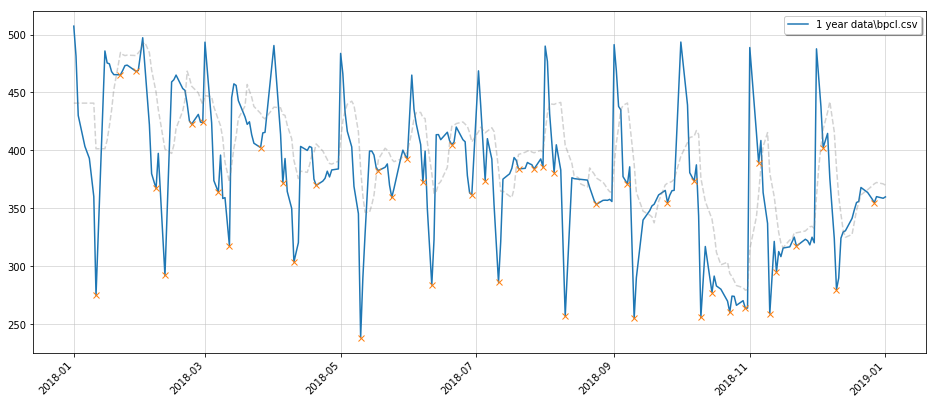


Low points dates:
 Date
2018-01-15    485.80
2018-01-25    473.60
2018-02-01    497.20
2018-02-08    397.50
2018-02-16    465.00
2018-02-26    431.10
2018-03-01    493.40
2018-03-08    396.00
2018-03-10    359.35
2018-03-13    445.55
2018-04-01    490.50
2018-04-06    393.05
2018-04-10    303.85
2018-04-13    403.50
2018-05-01    483.70
2018-05-15    399.55
2018-05-22    388.40
2018-06-02    465.00
2018-06-08    399.45
2018-06-18    415.75
2018-06-22    420.20
2018-07-02    468.65
2018-07-06    410.20
2018-07-18    393.90
2018-07-30    392.70
2018-08-01    490.00
2018-08-06    404.90
2018-08-13    376.50
2018-09-01    491.25
2018-09-04    435.00
2018-09-08    385.90
2018-09-24    365.55
2018-10-01    493.50
2018-10-08    387.60
2018-10-12    317.20
2018-10-24    274.45
2018-11-01    488.75
2018-11-06    408.60
2018-11-12    321.60
2018-11-14    312.85
2018-11-21    325.30
2018-12-01    487.65
2018-12-24    363.80
dtype: float64


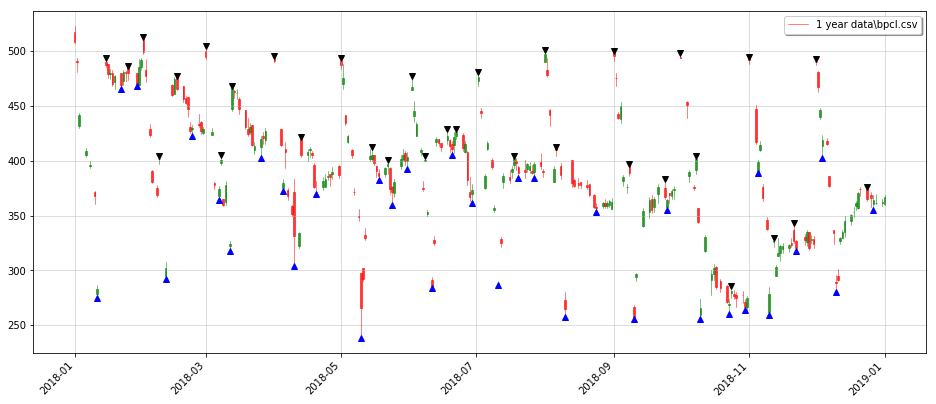

None
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      518.00      523.00     507.20       508.60    0.000000   
2018-01-02      491.10      493.90     481.45       490.35    0.000000   
2018-01-03      432.00      443.90     430.20       441.90    0.000000   
2018-01-06      405.00      411.50     403.55       409.25    0.000000   
2018-01-08      395.00      399.90     393.20       396.00    0.000000   
2018-01-10      372.00      372.75     360.25       368.35    0.000000   
2018-01-11      278.20      287.00     275.10       283.45    0.000000   
2018-01-15      490.20      493.90     485.80       487.20    0.000000   
2018-01-16      488.00      488.15     475.45       479.45   -0.746457   
2018-01-17      479.00      484.00     474.75       479.85   -0.746457   
2018-01-18      480.10      482.75     468.00       470.25   -0.746457   
2018-01-19      471.90      478.5

             Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-12-28      361.80       369.8      360.2       361.90         NaN   
2018-12-31      361.90       364.8      358.8       362.75         NaN   
2019-01-01      361.05       369.3      360.0       367.20         NaN   

            low_slope          trend  
Date                                  
2018-12-28        NaN  indeterminate  
2018-12-31        NaN  indeterminate  
2019-01-01        NaN  indeterminate  

trend:
 -0.2580088273854871

higer high data:
            related high date    high_type
Date                                     
2018-02-01        2018-01-15  higher_high
2018-01-31        2018-01-25  higher_high

lower low data:
            related low date   low_type  resistance  resistance_dilution
Date                                                                   
2018-05-10       2018-01-11  lower_low      298.05     

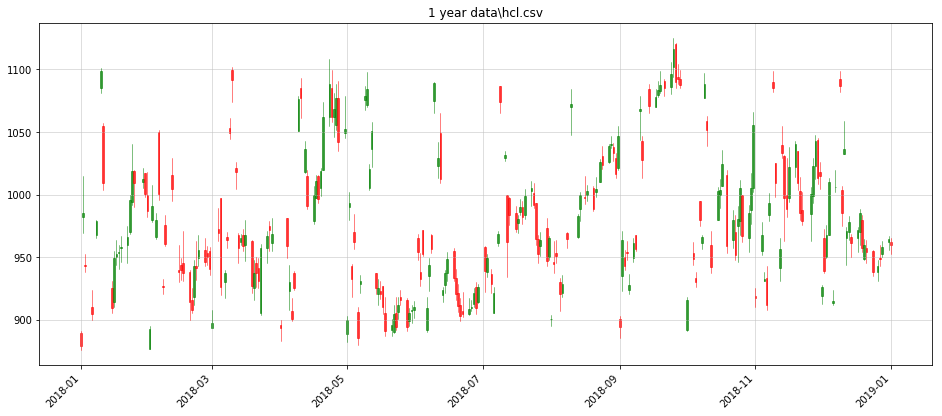

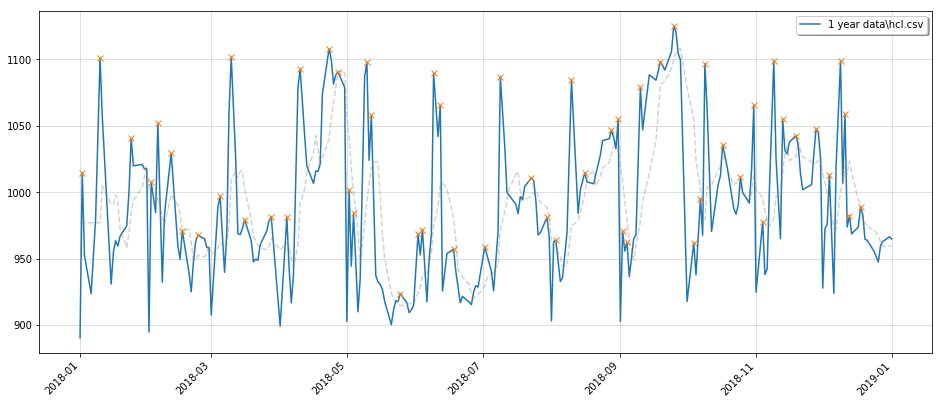


High points dates:
 Date
2018-01-02    1014.95
2018-01-10    1101.00
2018-01-24    1040.70
2018-02-02    1007.70
2018-02-05    1051.95
2018-02-11    1029.50
2018-02-16     970.95
2018-02-23     967.90
2018-03-05     997.00
2018-03-10    1101.70
2018-03-16     979.55
2018-03-28     981.60
2018-04-04     981.25
2018-04-10    1092.85
2018-04-23    1108.00
2018-04-27    1090.65
2018-05-02    1001.80
2018-05-04     984.20
2018-05-10    1098.00
2018-05-12    1058.00
2018-05-25     923.85
2018-06-02     968.75
2018-06-04     972.00
2018-06-09    1089.80
2018-06-12    1065.50
2018-06-18     957.35
2018-07-02     959.00
2018-07-09    1086.95
2018-07-23    1010.95
2018-07-30     981.15
2018-08-03     964.00
2018-08-10    1084.55
2018-08-16    1014.80
2018-08-28    1046.75
2018-08-31    1055.00
2018-09-02     970.60
2018-09-04     962.65
2018-09-10    1079.05
2018-09-19    1098.45
2018-09-25    1125.05
2018-10-04     961.95
2018-10-07     995.00
2018-10-09    1096.90
2018-10-17    1036.00
2018-1

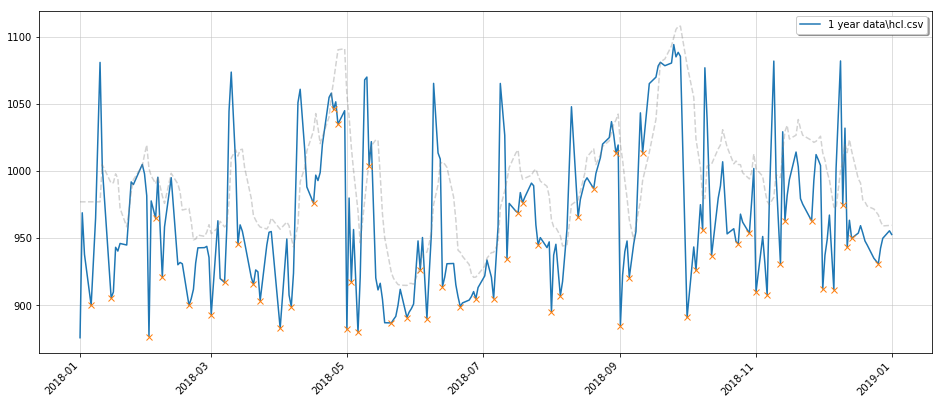


Low points dates:
 Date
2018-01-02     969.00
2018-01-10    1081.00
2018-01-24     992.00
2018-02-02     977.85
2018-02-05     995.50
2018-02-11     995.15
2018-02-16     931.00
2018-02-23     942.90
2018-03-05     920.00
2018-03-10    1073.80
2018-03-16     947.05
2018-03-28     955.05
2018-04-04     949.50
2018-04-10    1061.00
2018-04-23    1055.00
2018-04-27    1035.00
2018-05-02     980.00
2018-05-04     956.55
2018-05-10    1070.10
2018-05-12    1022.00
2018-05-25     912.00
2018-06-02     948.05
2018-06-04     950.60
2018-06-09    1065.40
2018-06-12    1009.00
2018-06-18     931.25
2018-07-02     922.00
2018-07-09    1065.35
2018-07-23     991.10
2018-07-30     943.10
2018-08-03     945.55
2018-08-10    1048.00
2018-08-16     992.30
2018-08-28    1036.90
2018-08-31    1019.50
2018-09-02     922.55
2018-09-04     948.00
2018-09-10    1043.45
2018-09-19    1081.10
2018-09-25    1094.30
2018-10-04     943.55
2018-10-07     975.05
2018-10-09    1077.00
2018-10-17    1007.00
2018-10

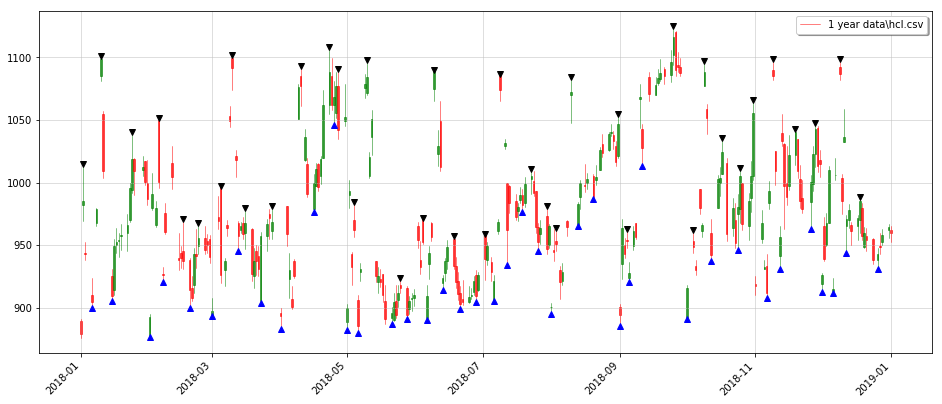

None
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      889.00      890.70     875.95       878.70    0.000000   
2018-01-02      982.10     1014.95     969.00       984.90    0.000000   
2018-01-03      943.80      952.45     938.00       942.80    1.524345   
2018-01-06      910.00      923.90     900.00       904.85    1.524345   
2018-01-08      968.00      980.00     965.00       978.65    1.524345   
2018-01-10     1085.20     1101.00    1081.00      1098.40    1.524345   
2018-01-11     1055.00     1057.45    1003.50      1008.90   -1.422636   
2018-01-15      925.00      931.10     905.50       909.25   -1.422636   
2018-01-16      914.10      955.00     910.00       949.25   -1.422636   
2018-01-17      950.00      963.60     943.30       952.85   -1.422636   
2018-01-18      953.00      959.65     940.50       954.25   -1.422636   
2018-01-19      957.00      967.0


higer high data:
            related high date    high_type
Date                                     
2018-01-10        2018-01-02  higher_high
2018-09-25        2018-01-10  higher_high

lower low data:
            related low date   low_type  resistance  resistance_dilution
Date                                                                   
2018-02-01       2018-01-06  lower_low      895.00                  221
2018-02-01       2018-01-15  lower_low      895.00                  221
2018-02-19       2018-02-07  lower_low      939.70                  156
2018-03-01       2018-02-19  lower_low      907.80                  194
2018-05-06       2018-03-01  lower_low      910.20                  150
2018-03-19       2018-03-13  lower_low      963.60                  109
2018-04-01       2018-03-23  lower_low      899.45                  183
2018-05-01       2018-04-16  lower_low      903.00                  161
2018-04-27       2018-04-25  lower_low     1090.65                    3
201

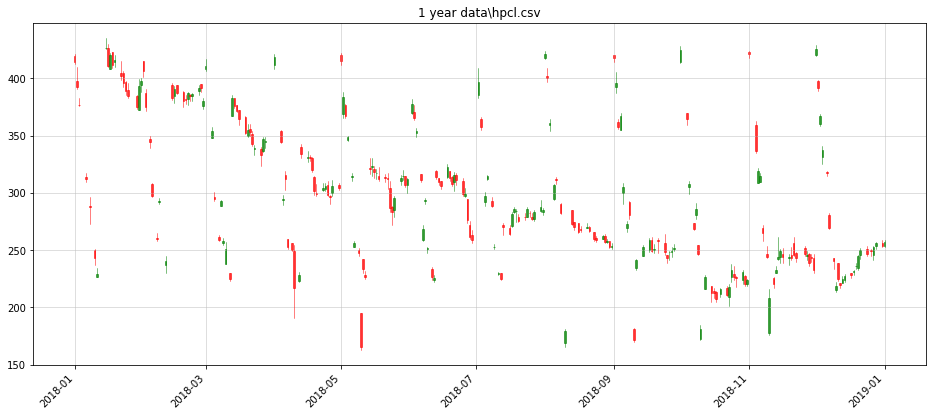

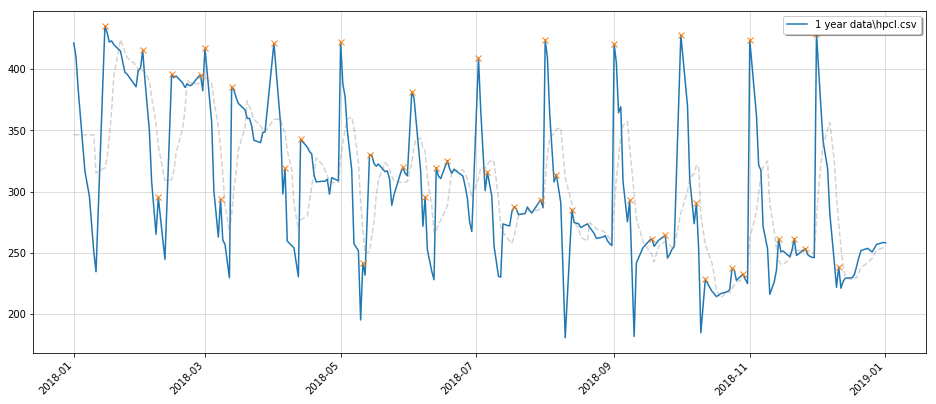


High points dates:
 Date
2018-01-15    435.00
2018-02-01    415.20
2018-02-08    295.50
2018-02-14    395.75
2018-02-27    395.35
2018-03-01    416.95
2018-03-08    294.00
2018-03-13    385.50
2018-04-01    420.95
2018-04-06    319.00
2018-04-13    342.70
2018-05-01    421.90
2018-05-11    241.90
2018-05-14    330.15
2018-05-29    319.85
2018-06-02    381.50
2018-06-08    295.85
2018-06-13    319.50
2018-06-18    325.35
2018-07-02    408.90
2018-07-06    315.90
2018-07-18    287.85
2018-07-30    293.60
2018-08-01    423.60
2018-08-06    313.95
2018-08-13    284.95
2018-09-01    420.40
2018-09-08    292.90
2018-09-18    261.65
2018-09-24    264.35
2018-10-01    427.90
2018-10-08    290.80
2018-10-12    228.55
2018-10-24    237.40
2018-10-29    232.90
2018-11-01    423.50
2018-11-14    261.65
2018-11-21    261.80
2018-11-26    253.65
2018-12-01    429.00
2018-12-11    238.85
dtype: float64


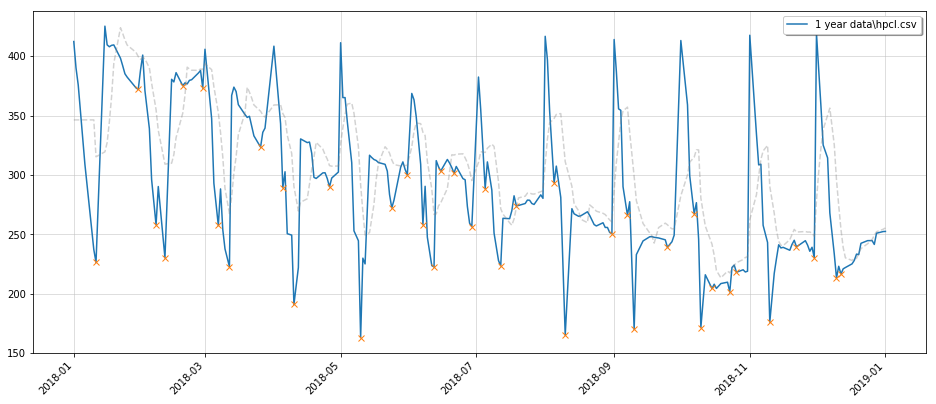


Low points dates:
 Date
2018-01-15    425.35
2018-02-01    401.00
2018-02-08    290.30
2018-02-14    380.60
2018-02-27    388.00
2018-03-01    405.90
2018-03-08    288.30
2018-03-13    367.00
2018-04-01    408.50
2018-04-06    302.75
2018-04-13    330.40
2018-05-01    411.40
2018-05-11    230.00
2018-05-14    316.65
2018-05-29    311.05
2018-06-02    368.70
2018-06-08    290.50
2018-06-13    312.10
2018-06-18    313.10
2018-07-02    382.50
2018-07-06    311.05
2018-07-18    282.50
2018-07-30    283.30
2018-08-01    416.80
2018-08-06    307.50
2018-08-13    271.65
2018-09-01    414.10
2018-09-08    277.50
2018-09-18    248.10
2018-09-24    245.45
2018-10-01    413.25
2018-10-08    276.70
2018-10-12    216.00
2018-10-24    222.15
2018-10-29    220.20
2018-11-01    417.70
2018-11-14    241.25
2018-11-21    245.05
2018-11-26    244.70
2018-12-01    419.10
2018-12-11    223.15
dtype: float64


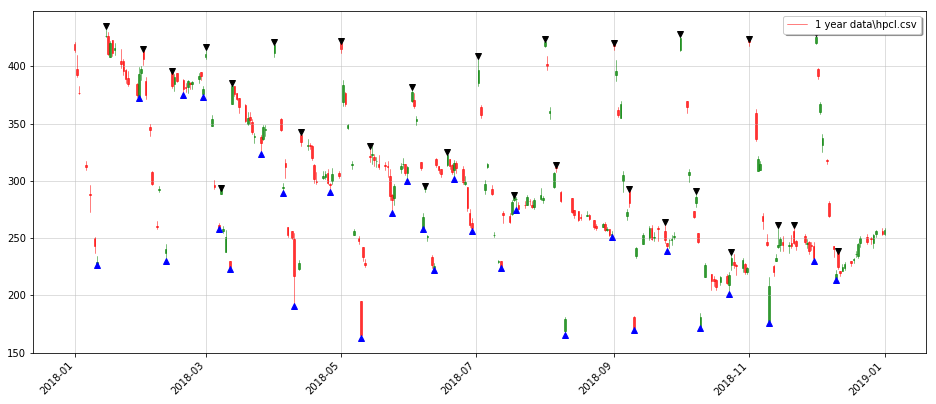

None
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      419.00      421.20     412.40       413.75    0.000000   
2018-01-02      397.30      409.80     390.20       392.35    0.000000   
2018-01-03      377.00      383.10     375.80       376.75    0.000000   
2018-01-06      314.00      316.85     309.05       312.15    0.000000   
2018-01-08      288.90      296.50     273.10       287.35    0.000000   
2018-01-10      250.05      251.00     237.30       243.15    0.000000   
2018-01-11      226.40      234.75     226.40       229.50    0.000000   
2018-01-15      426.00      435.00     425.35       426.05    0.000000   
2018-01-16      426.00      429.55     409.60       410.40   -1.025932   
2018-01-17      408.00      422.05     408.00       420.30   -1.025932   
2018-01-18      423.00      423.00     409.20       411.75   -1.025932   
2018-01-19      413.90      419.9

[233 rows x 7 columns]

test data:
             Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-12-12      221.00      221.30     216.60       219.30         NaN   
2018-12-13      221.40      227.00     221.00       225.15         NaN   
2018-12-14      224.00      229.50     222.10       227.30         NaN   
2018-12-17      229.80      229.80     225.20       228.45         NaN   
2018-12-18      231.20      232.25     228.10       231.35         NaN   
2018-12-19      235.75      238.80     233.40       236.15         NaN   
2018-12-20      234.30      246.00     233.00       244.45         NaN   
2018-12-21      246.10      252.05     242.50       250.05         NaN   
2018-12-24      251.00      253.85     244.75       246.30         NaN   
2018-12-26      250.30      250.85     244.80       248.85         NaN   
2018-12-27      246.00      253.75     241.55       252.70         NaN   
20

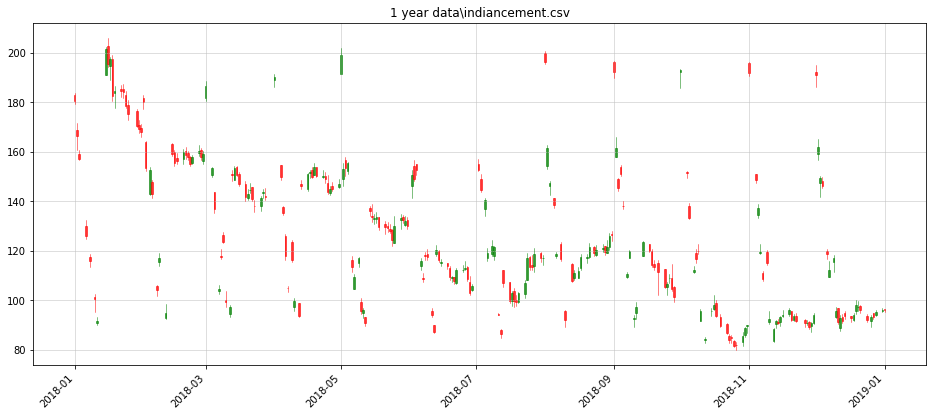

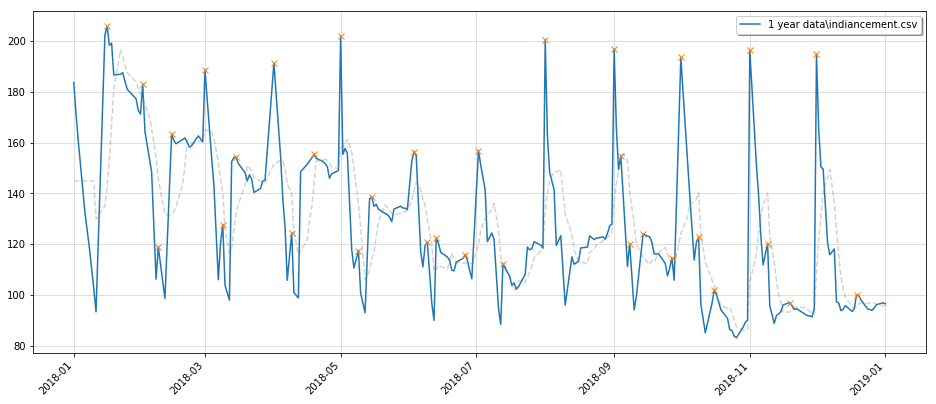


High points dates:
 Date
2018-01-16    205.95
2018-02-01    183.00
2018-02-08    118.90
2018-02-14    163.40
2018-03-01    188.70
2018-03-09    127.65
2018-03-15    154.35
2018-04-01    191.45
2018-04-09    124.40
2018-04-19    155.45
2018-05-01    202.00
2018-05-09    117.50
2018-05-15    138.70
2018-06-03    156.50
2018-06-09    120.80
2018-06-13    122.45
2018-06-26    115.85
2018-07-02    156.90
2018-07-13    112.25
2018-08-01    200.60
2018-09-01    196.90
2018-09-04    154.80
2018-09-08    120.25
2018-09-14    124.00
2018-09-27    114.60
2018-10-01    193.60
2018-10-09    122.75
2018-10-16    101.90
2018-11-01    196.40
2018-11-09    120.25
2018-11-19     97.00
2018-12-01    194.90
2018-12-19    100.00
dtype: float64


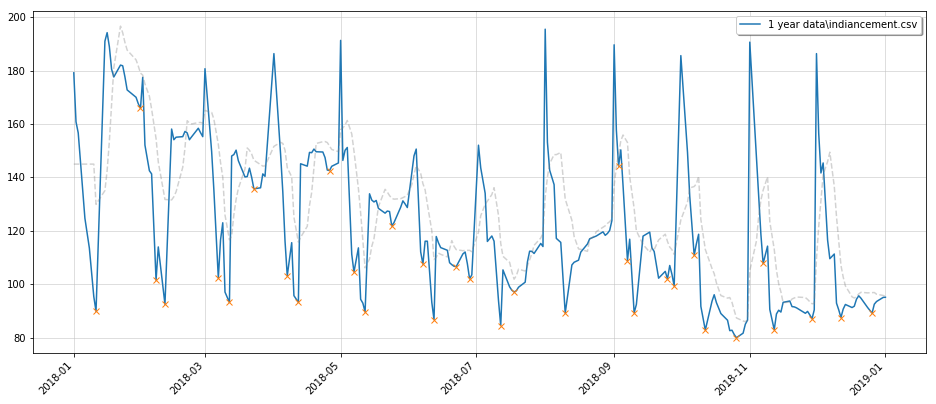


Low points dates:
 Date
2018-01-16    194.20
2018-02-01    177.45
2018-02-08    113.95
2018-02-14    158.10
2018-03-01    180.70
2018-03-09    123.00
2018-03-15    150.20
2018-04-01    186.35
2018-04-09    115.55
2018-04-19    150.60
2018-05-01    191.30
2018-05-09    113.60
2018-05-15    131.50
2018-06-03    148.05
2018-06-09    116.10
2018-06-13    117.85
2018-06-26    112.05
2018-07-02    152.05
2018-07-13    105.35
2018-08-01    195.50
2018-09-01    189.65
2018-09-04    150.30
2018-09-08    116.85
2018-09-14    118.00
2018-09-27    103.70
2018-10-01    185.60
2018-10-09    118.70
2018-10-16     96.05
2018-11-01    190.65
2018-11-09    114.25
2018-11-19     93.70
2018-12-01    186.35
2018-12-19     94.40
dtype: float64


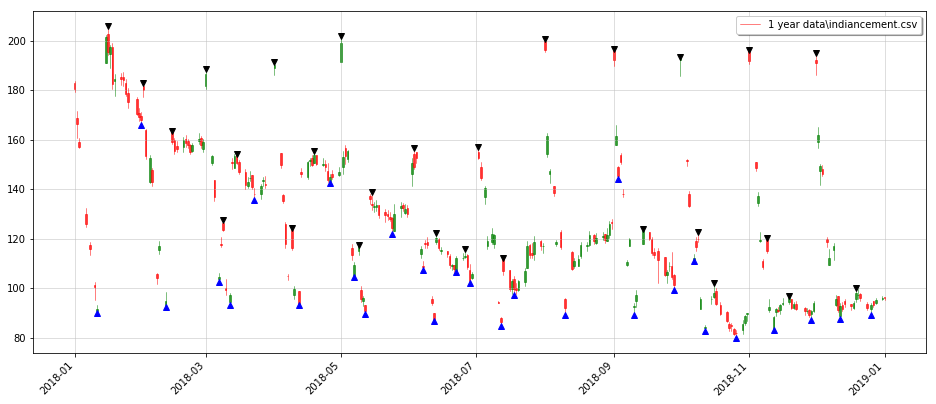

None
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      183.05      183.80     179.15       180.60    0.000000   
2018-01-02      168.75      171.50     160.80       166.20    0.000000   
2018-01-03      159.00      160.85     156.65       157.25    0.000000   
2018-01-06      130.00      132.60     124.70       125.85    0.000000   
2018-01-08      117.60      118.70     113.55       115.95    0.000000   
2018-01-10      101.45      102.35      95.35       100.35    0.000000   
2018-01-11       90.65       93.35      89.85        91.75    0.000000   
2018-01-15      191.00      202.50     191.00       201.40    0.000000   
2018-01-16      202.85      205.95     194.20       195.40    0.000000   
2018-01-17      194.80      198.40     188.95       197.70   -1.123843   
2018-01-18      197.65      199.25     180.50       182.45   -1.123843   
2018-01-19      183.65      186.7

2018-03-01        2018-02-14  higher_high

lower low data:
            related low date   low_type  resistance  resistance_dilution
Date                                                                   
2018-06-12       2018-01-11  lower_low       90.00                  124
2018-02-02       2018-01-31  lower_low      164.45                    8
2018-05-12       2018-02-11  lower_low       93.00                  131
2018-03-10       2018-03-07  lower_low      103.85                  138
2018-05-12       2018-03-12  lower_low       93.00                  131
2018-04-05       2018-03-23  lower_low      138.00                   38
2018-05-12       2018-04-12  lower_low       93.00                  131
2018-05-06       2018-04-26  lower_low      117.80                   60
2018-05-10       2018-05-07  lower_low      100.75                  105
2018-06-12       2018-05-12  lower_low       90.00                  124
2018-06-06       2018-05-24  lower_low      117.15                   47
2018

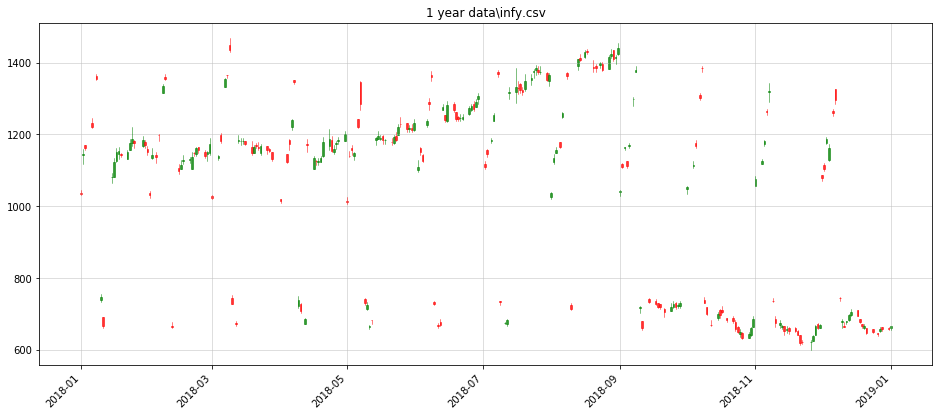

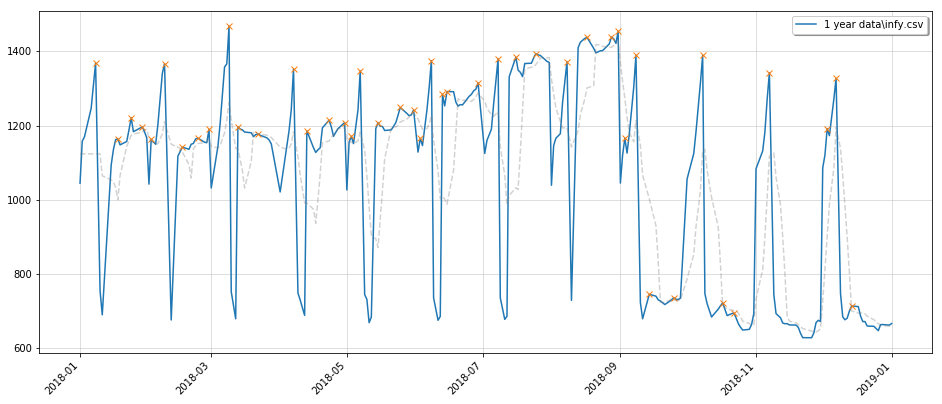


High points dates:
 Date
2018-01-08    1368.45
2018-01-18    1164.90
2018-01-24    1221.05
2018-01-29    1196.25
2018-02-02    1162.90
2018-02-08    1366.75
2018-02-16    1141.65
2018-02-23    1166.00
2018-02-28    1189.50
2018-03-09    1467.90
2018-03-13    1197.00
2018-03-22    1177.45
2018-04-07    1352.65
2018-04-13    1185.90
2018-04-23    1214.40
2018-04-30    1207.95
2018-05-03    1170.80
2018-05-07    1347.25
2018-05-15    1208.00
2018-05-25    1248.65
2018-05-31    1242.00
2018-06-03    1165.40
2018-06-08    1375.00
2018-06-13    1284.00
2018-06-15    1291.50
2018-06-29    1315.00
2018-07-08    1379.95
2018-07-16    1384.40
2018-07-25    1393.80
2018-08-08    1372.50
2018-08-17    1437.65
2018-08-28    1438.40
2018-08-31    1454.30
2018-09-03    1166.00
2018-09-08    1389.45
2018-09-14     745.00
2018-09-25     736.00
2018-10-08    1389.00
2018-10-17     721.80
2018-10-22     695.05
2018-11-07    1342.10
2018-12-03    1191.85
2018-12-07    1327.10
2018-12-14     713.70
dtype:

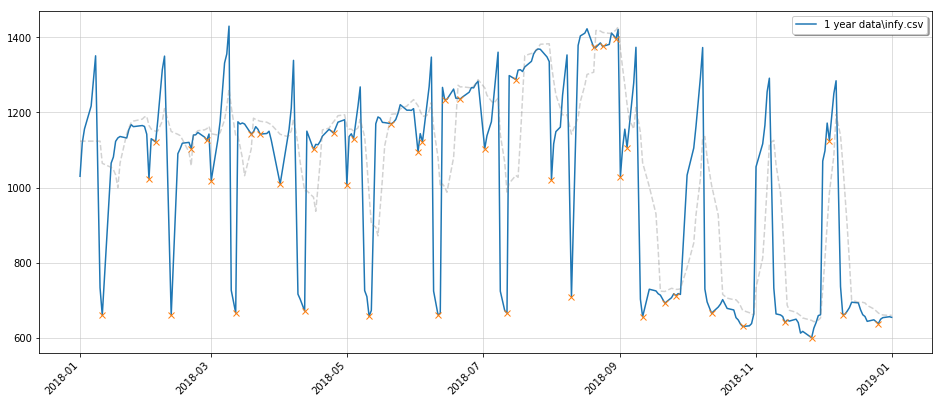


Low points dates:
 Date
2018-01-08    1351.00
2018-01-18    1132.10
2018-01-24    1167.50
2018-01-29    1165.20
2018-02-02    1130.10
2018-02-08    1350.15
2018-02-16    1118.10
2018-02-23    1146.75
2018-02-28    1142.55
2018-03-09    1430.00
2018-03-13    1175.15
2018-03-22    1155.30
2018-04-07    1338.85
2018-04-13    1150.25
2018-04-23    1155.25
2018-04-30    1180.65
2018-05-03    1143.25
2018-05-07    1268.10
2018-05-15    1188.10
2018-05-25    1220.80
2018-05-31    1210.25
2018-06-03    1143.60
2018-06-08    1347.50
2018-06-13    1266.80
2018-06-15    1235.00
2018-06-29    1283.25
2018-07-08    1360.65
2018-07-16    1287.70
2018-07-25    1365.45
2018-08-08    1353.30
2018-08-17    1423.00
2018-08-28    1411.50
2018-08-31    1421.10
2018-09-03    1155.55
2018-09-08    1373.65
2018-09-14     729.05
2018-09-25     717.00
2018-10-08    1373.05
2018-10-17     701.35
2018-10-22     673.80
2018-11-07    1291.35
2018-12-03    1171.75
2018-12-07    1284.45
2018-12-14     694.40
dtype: 

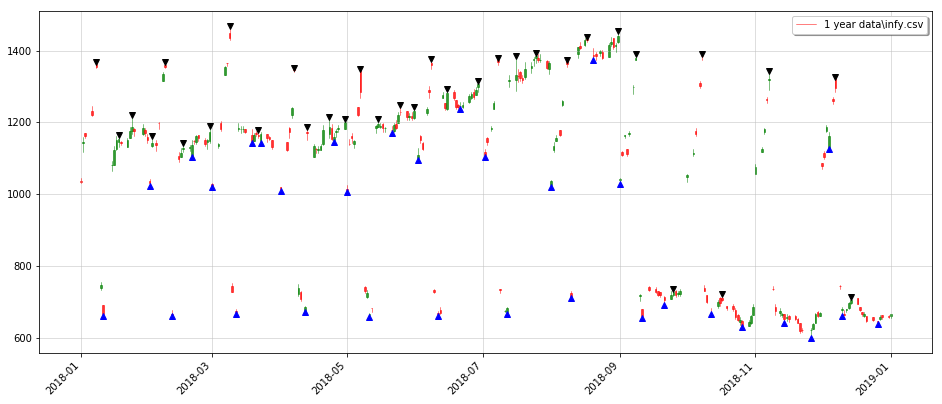

None
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01     1037.70     1044.50    1030.00      1033.55    0.000000   
2018-01-02     1142.20     1157.90    1118.55      1144.60    0.000000   
2018-01-03     1169.60     1169.60    1156.05      1160.75    0.000000   
2018-01-06     1230.40     1246.25    1217.20      1220.80    0.000000   
2018-01-08     1363.80     1368.45    1351.00      1354.05    0.000000   
2018-01-10      737.50      754.90     733.00       746.65   -1.541328   
2018-01-11      689.70      689.70     659.60       666.70   -1.541328   
2018-01-15     1080.00     1092.95    1065.10      1081.15   -1.541328   
2018-01-16     1081.25     1134.80    1081.25      1122.85   -1.541328   
2018-01-17     1124.85     1161.80    1123.00      1152.10   -1.541328   
2018-01-18     1145.00     1164.90    1132.10      1152.70   -1.541328   
2018-01-19     1145.00     1147.9


higer high data:
            related high date    high_type
Date                                     
2018-03-09        2018-01-08  higher_high
2018-01-23        2018-01-18  higher_high

lower low data:
            related low date   low_type  resistance  resistance_dilution
Date                                                                   
2018-09-11       2018-01-11  lower_low      679.00                   39
2018-02-11       2018-02-01  lower_low      675.80                  183
2018-09-11       2018-02-11  lower_low      679.00                   39
2018-03-01       2018-02-20  lower_low     1031.60                  131
2018-03-10       2018-03-01  lower_low      751.95                  128
2018-09-11       2018-03-12  lower_low      679.00                   39
2018-03-28       2018-03-19  lower_low     1150.75                   92
2018-03-28       2018-03-23  lower_low     1150.75                   92
2018-04-09       2018-04-01  lower_low      748.50                  111
201

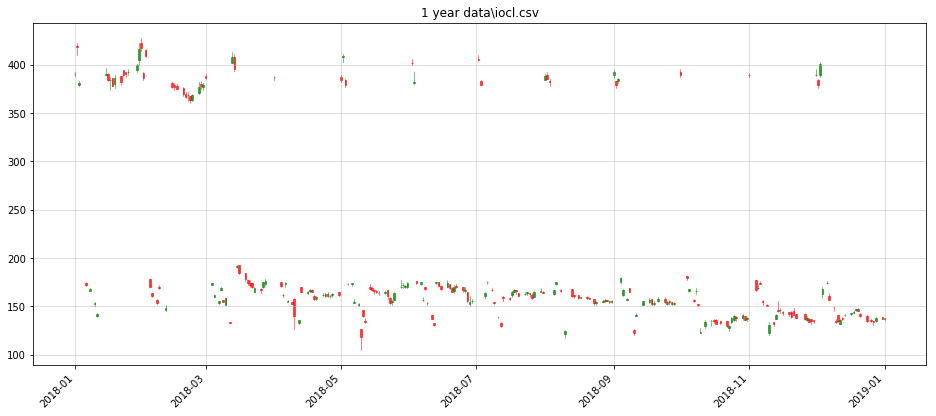

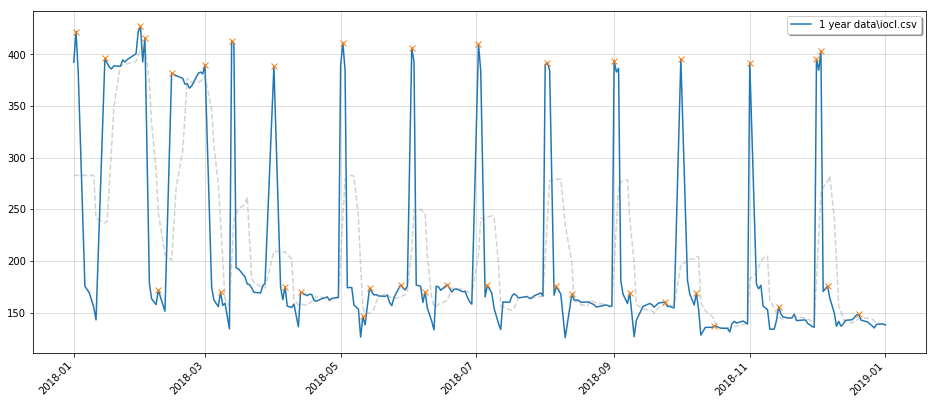


High points dates:
 Date
2018-01-02    422.20
2018-01-15    396.20
2018-01-31    427.40
2018-02-02    416.35
2018-02-08    171.80
2018-02-14    381.75
2018-03-01    389.90
2018-03-08    169.80
2018-03-13    412.90
2018-04-01    388.35
2018-04-06    175.15
2018-04-13    169.90
2018-05-02    411.40
2018-05-11    146.50
2018-05-14    173.70
2018-05-28    177.00
2018-06-02    406.35
2018-06-08    169.90
2018-06-18    177.20
2018-07-02    409.75
2018-07-06    176.45
2018-08-02    391.90
2018-08-06    175.50
2018-08-13    168.00
2018-09-01    394.00
2018-09-08    169.20
2018-09-24    160.20
2018-10-01    395.50
2018-10-08    168.80
2018-10-16    136.95
2018-11-01    391.85
2018-11-14    155.50
2018-12-01    395.40
2018-12-03    403.05
2018-12-06    175.80
2018-12-20    148.25
dtype: float64


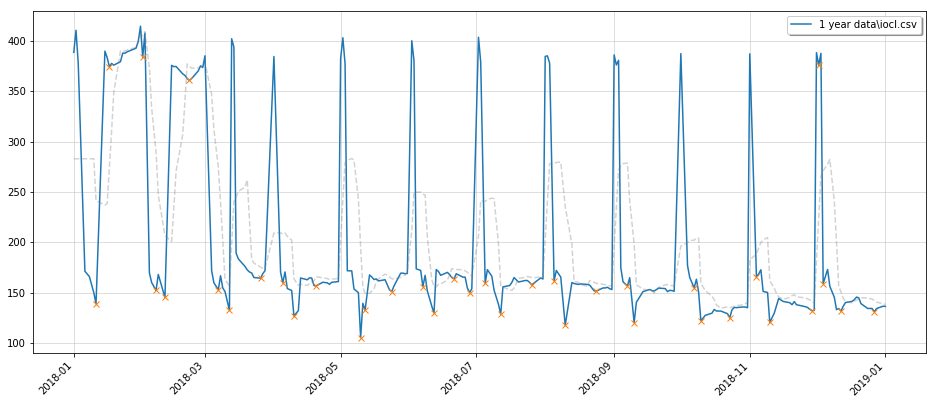


Low points dates:
 Date
2018-01-02    410.40
2018-01-15    389.70
2018-01-31    414.50
2018-02-02    407.50
2018-02-08    168.05
2018-02-14    375.60
2018-03-01    385.10
2018-03-08    166.75
2018-03-13    402.00
2018-04-01    384.40
2018-04-06    170.50
2018-04-13    164.55
2018-05-02    403.00
2018-05-11    139.40
2018-05-14    167.55
2018-05-28    169.30
2018-06-02    400.00
2018-06-08    167.20
2018-06-18    170.10
2018-07-02    403.50
2018-07-06    172.80
2018-08-02    385.00
2018-08-06    172.00
2018-08-13    160.00
2018-09-01    386.00
2018-09-08    164.80
2018-09-24    154.00
2018-10-01    387.25
2018-10-08    163.30
2018-10-16    133.30
2018-11-01    387.00
2018-11-14    144.20
2018-12-01    388.25
2018-12-03    387.50
2018-12-06    173.00
2018-12-20    144.90
dtype: float64


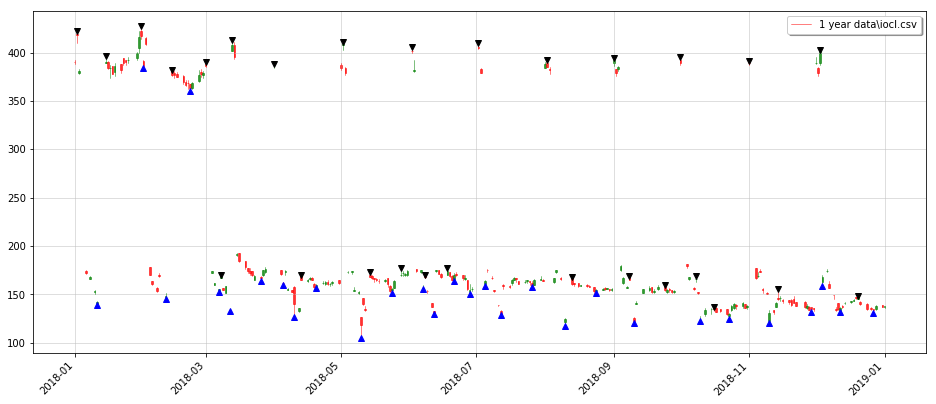

None
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      390.00      392.50     388.50       389.95    0.000000   
2018-01-02      419.60      422.20     410.40       417.90    0.000000   
2018-01-03      379.00      382.75     377.65       381.50   -1.343997   
2018-01-06      174.10      175.65     171.20       172.35   -1.343997   
2018-01-08      166.20      169.00     166.00       168.00   -1.343997   
2018-01-10      153.00      155.00     150.00       153.95   -1.343997   
2018-01-11      139.75      142.95     139.00       141.85   -1.343997   
2018-01-15      389.70      396.20     389.70       390.85   -1.343997   
2018-01-16      390.00      391.50     383.40       384.15    1.231839   
2018-01-17      383.90      387.75     374.25       384.05    1.231839   
2018-01-18      386.00      386.00     377.50       378.05    1.231839   
2018-01-19      379.90      389.0


higer high data:
            related high date    high_type
Date                                     
2018-01-29        2018-01-15  higher_high
2018-03-01        2018-02-14  higher_high

lower low data:
            related low date   low_type  resistance  resistance_dilution
Date                                                                   
2018-03-12       2018-01-11  lower_low      134.30                  186
2018-02-04       2018-02-01  lower_low      178.50                   37
2018-03-12       2018-02-11  lower_low      134.30                  186
2018-03-04       2018-02-22  lower_low      174.60                   32
2018-03-12       2018-03-07  lower_low      134.30                  186
2018-05-10       2018-03-12  lower_low      126.30                  159
2018-04-05       2018-03-26  lower_low      162.50                   76
2018-04-07       2018-04-05  lower_low      156.35                   99
2018-05-10       2018-04-10  lower_low      126.30                  159
201

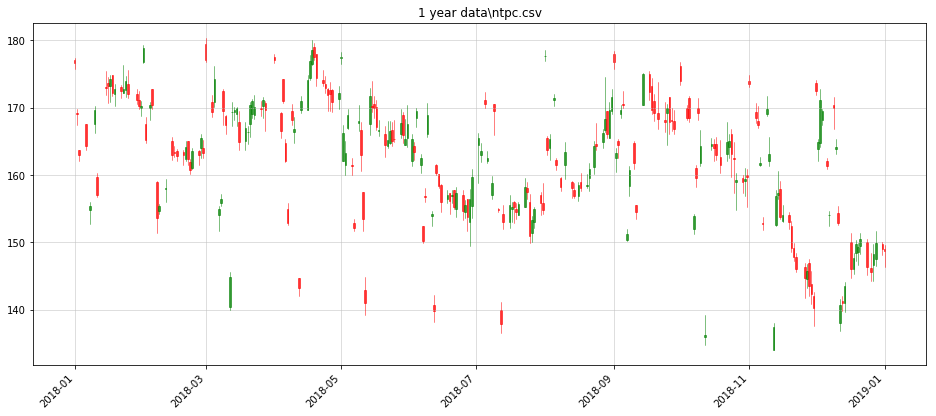

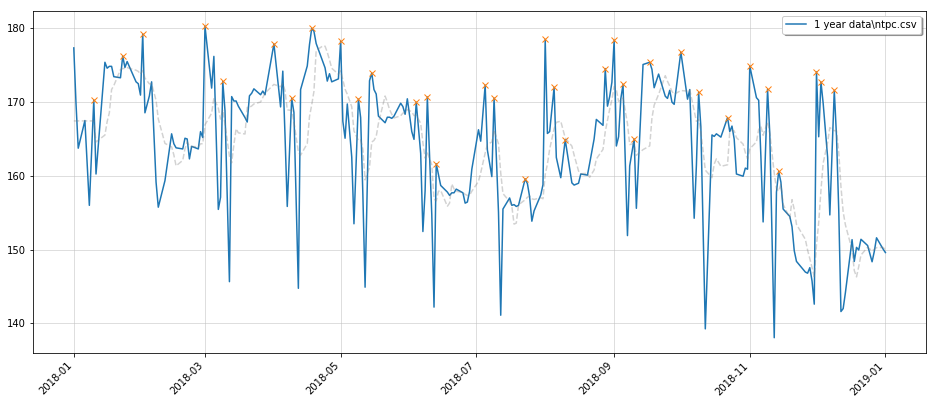


High points dates:
 Date
2018-01-10    170.30
2018-01-23    176.25
2018-02-01    179.25
2018-03-01    180.30
2018-03-09    172.80
2018-04-01    177.90
2018-04-09    170.50
2018-04-18    180.00
2018-05-01    178.25
2018-05-09    170.40
2018-05-15    173.95
2018-06-04    170.00
2018-06-09    170.70
2018-06-13    161.65
2018-07-05    172.30
2018-07-09    170.55
2018-07-23    159.60
2018-08-01    178.50
2018-08-05    172.00
2018-08-10    164.90
2018-08-28    174.55
2018-09-01    178.40
2018-09-05    172.40
2018-09-10    165.00
2018-09-17    175.40
2018-10-01    176.80
2018-10-09    171.35
2018-10-22    167.90
2018-11-01    174.90
2018-11-09    171.75
2018-11-14    160.60
2018-12-01    174.10
2018-12-03    172.75
2018-12-09    171.60
dtype: float64


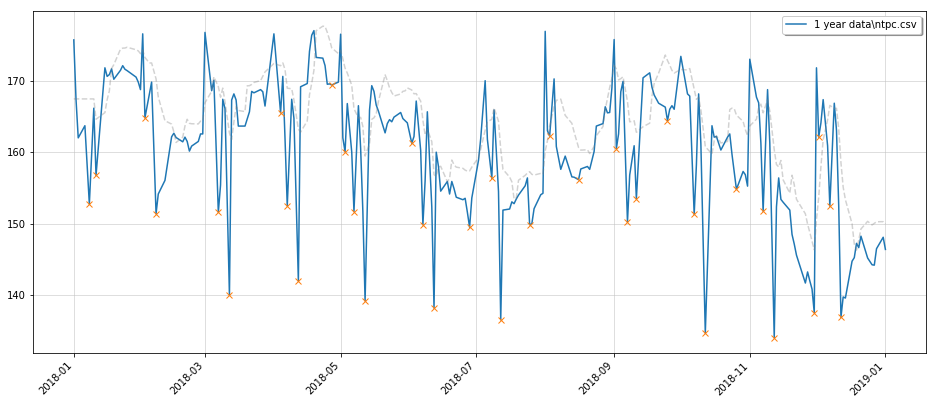


Low points dates:
 Date
2018-01-10    166.15
2018-01-23    172.10
2018-02-01    176.55
2018-03-01    176.75
2018-03-09    167.40
2018-04-01    176.55
2018-04-09    167.40
2018-04-18    176.35
2018-05-01    176.50
2018-05-09    166.50
2018-05-15    169.30
2018-06-04    167.15
2018-06-09    165.65
2018-06-13    160.00
2018-07-05    170.00
2018-07-09    165.90
2018-07-23    155.30
2018-08-01    176.90
2018-08-05    170.25
2018-08-10    159.45
2018-08-28    166.35
2018-09-01    175.75
2018-09-05    169.90
2018-09-10    160.90
2018-09-17    171.10
2018-10-01    173.40
2018-10-09    168.15
2018-10-22    162.10
2018-11-01    173.00
2018-11-09    168.75
2018-11-14    156.40
2018-12-01    171.80
2018-12-03    164.10
2018-12-09    166.85
dtype: float64


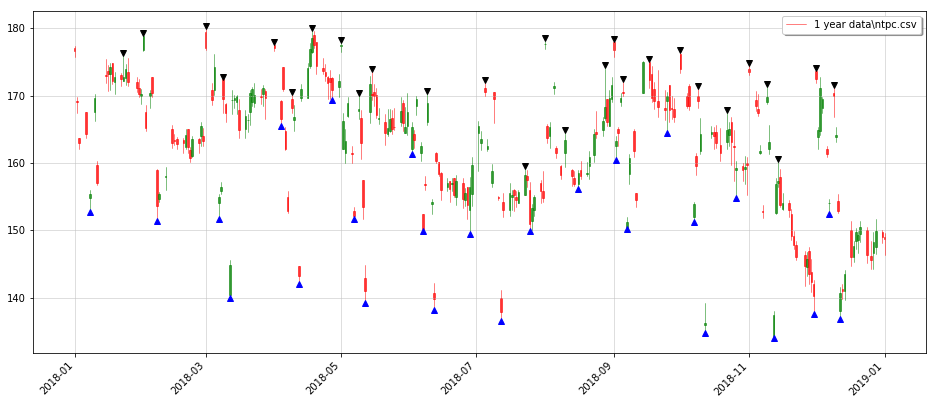

None
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      177.05      177.35     175.70       176.55    0.000000   
2018-01-02      169.25      169.80     167.40       169.05    0.000000   
2018-01-03      163.70      163.75     162.00       163.00    0.000000   
2018-01-06      167.50      167.50     163.70       164.35    0.000000   
2018-01-08      154.80      156.00     152.75       155.35    0.000000   
2018-01-10      167.50      170.30     166.15       169.60    0.000000   
2018-01-11      159.75      160.25     156.75       157.00    0.000000   
2018-01-15      173.00      175.40     171.80       172.95    0.000000   
2018-01-16      173.60      174.60     170.60       173.25    0.000000   
2018-01-17      173.20      174.85     170.85       174.25    0.000000   
2018-01-18      174.85      174.85     171.65       172.15    0.000000   
2018-01-19      172.05      173.4


higer high data:
            related high date    high_type
Date                                     
2018-02-01        2018-01-23  higher_high
2018-04-01        2018-03-09  higher_high

lower low data:
            related low date   low_type  resistance  resistance_dilution
Date                                                                   
2018-03-12       2018-01-08  lower_low      145.65                  188
2018-03-12       2018-02-07  lower_low      145.65                  188
2018-03-12       2018-03-07  lower_low      145.65                  188
2018-06-12       2018-03-12  lower_low      142.20                  131
2018-04-06       2018-04-04  lower_low      165.40                   64
2018-05-12       2018-04-12  lower_low      144.90                  149
2018-05-02       2018-04-27  lower_low      167.40                   40
2018-05-12       2018-05-07  lower_low      144.90                  149
2018-07-12       2018-05-12  lower_low      141.10                  111
201

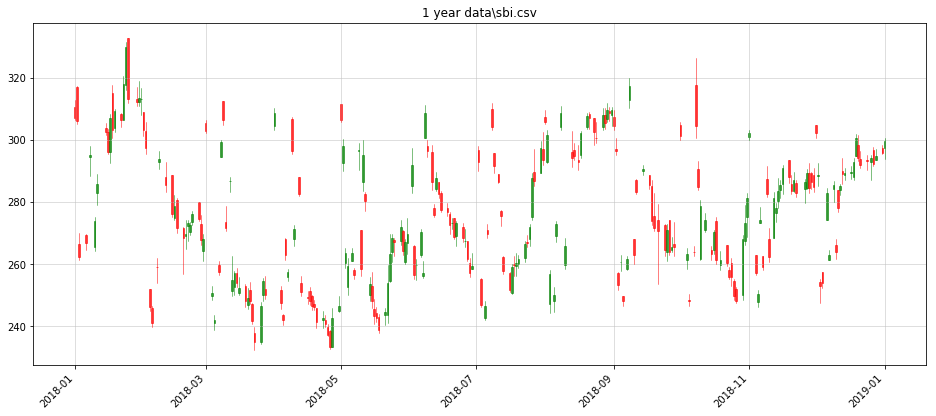

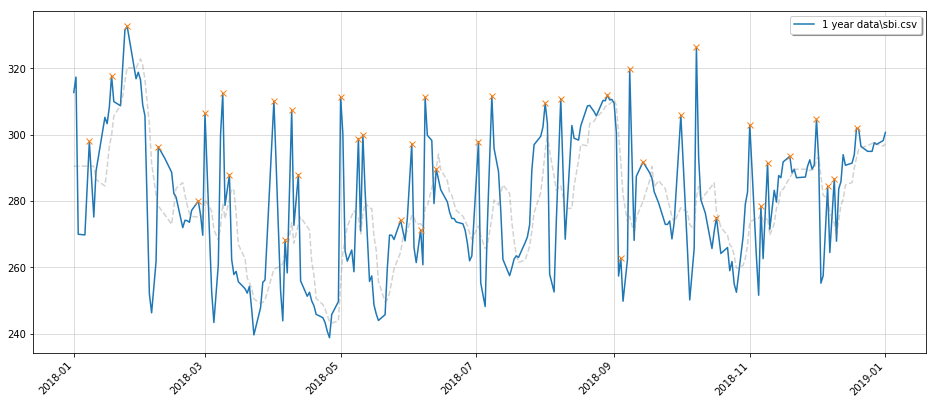


High points dates:
 Date
2018-01-08    298.00
2018-01-18    317.80
2018-01-25    332.75
2018-02-08    296.40
2018-02-26    280.00
2018-03-01    306.45
2018-03-09    312.50
2018-03-12    287.90
2018-04-01    310.20
2018-04-06    268.35
2018-04-09    307.45
2018-04-12    287.95
2018-05-01    311.40
2018-05-09    298.85
2018-05-11    300.00
2018-05-28    274.20
2018-06-02    297.30
2018-06-06    271.40
2018-06-08    311.35
2018-06-13    289.65
2018-07-02    297.90
2018-07-08    311.70
2018-08-01    309.50
2018-08-08    310.90
2018-08-29    312.00
2018-09-04    262.75
2018-09-08    319.85
2018-09-14    291.80
2018-10-01    305.85
2018-10-08    326.40
2018-10-17    275.00
2018-11-01    303.00
2018-11-06    278.40
2018-11-09    291.45
2018-11-19    293.50
2018-12-01    304.65
2018-12-06    284.40
2018-12-09    286.70
2018-12-19    302.00
dtype: float64


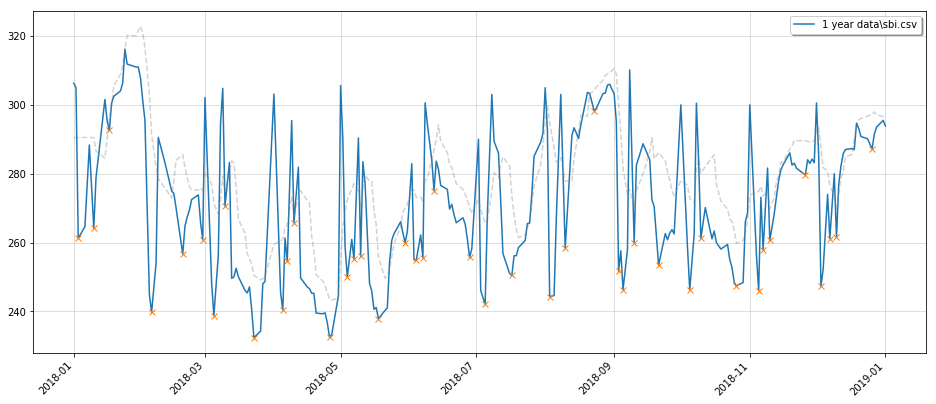


Low points dates:
 Date
2018-01-08    288.35
2018-01-18    300.50
2018-01-25    311.85
2018-02-08    290.55
2018-02-26    273.85
2018-03-01    302.15
2018-03-09    304.80
2018-03-12    283.25
2018-04-01    303.15
2018-04-06    261.30
2018-04-09    295.45
2018-04-12    281.90
2018-05-01    305.60
2018-05-09    290.40
2018-05-11    283.50
2018-05-28    266.05
2018-06-02    282.90
2018-06-06    262.20
2018-06-08    300.60
2018-06-13    283.65
2018-07-02    290.00
2018-07-08    303.05
2018-08-01    305.00
2018-08-08    303.05
2018-08-29    305.75
2018-09-04    257.60
2018-09-08    310.15
2018-09-14    288.70
2018-10-01    300.00
2018-10-08    300.50
2018-10-17    260.00
2018-11-01    300.00
2018-11-06    273.15
2018-11-09    281.65
2018-11-19    286.05
2018-12-01    300.55
2018-12-06    274.00
2018-12-09    280.00
2018-12-19    294.70
dtype: float64


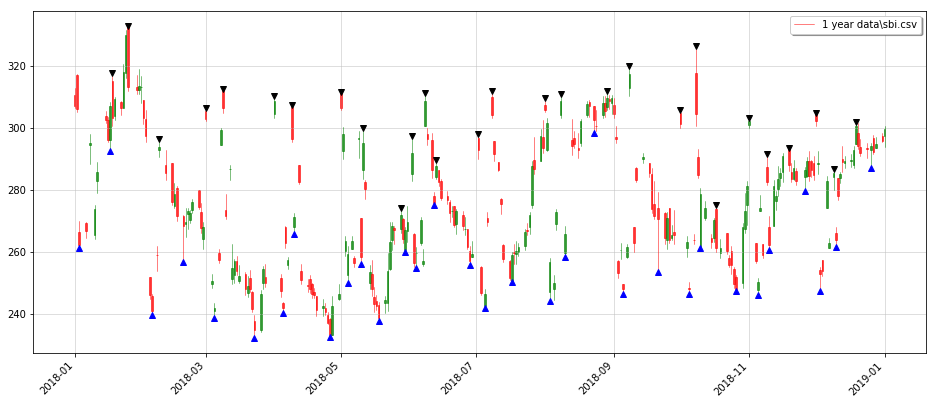

None
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      310.60      312.75     306.30       307.10    0.000000   
2018-01-02      316.90      317.40     305.00       306.05    0.000000   
2018-01-03      266.30      270.00     261.25       262.15    0.000000   
2018-01-06      269.25      269.80     264.60       266.70    0.000000   
2018-01-08      294.50      298.00     288.35       295.10    0.000000   
2018-01-10      265.50      275.20     264.10       273.85    0.000000   
2018-01-11      283.00      289.00     278.85       285.90    0.000000   
2018-01-15      303.95      305.25     301.55       302.60    0.000000   
2018-01-16      302.40      303.35     295.30       296.15    0.000000   
2018-01-17      296.00      308.40     292.60       307.10    0.000000   
2018-01-18      315.00      317.80     300.50       303.25    0.000000   
2018-01-19      303.95      310.0


higer high data:
            related high date    high_type
Date                                     
2018-01-23        2018-01-18  higher_high
2018-03-01        2018-02-08  higher_high

lower low data:
            related low date   low_type  resistance  resistance_dilution
Date                                                                   
2018-02-04       2018-01-03  lower_low      252.00                  187
2018-02-04       2018-01-17  lower_low      252.00                  187
2018-03-23       2018-02-05  lower_low      239.65                  190
2018-03-04       2018-02-19  lower_low      252.80                  171
2018-03-23       2018-03-05  lower_low      239.65                  190
2018-04-25       2018-04-05  lower_low      240.75                  171
2018-04-13       2018-04-10  lower_low      255.95                  149
2018-05-15       2018-05-04  lower_low      257.45                  134
2018-05-14       2018-05-10  lower_low      255.80                  139
201

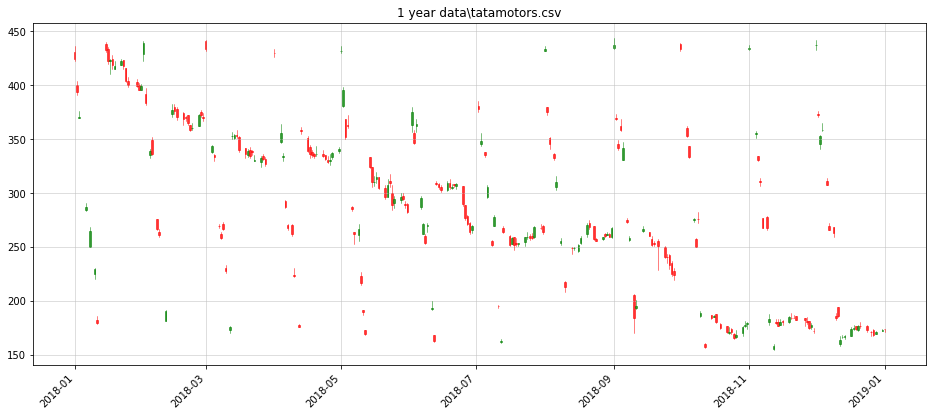

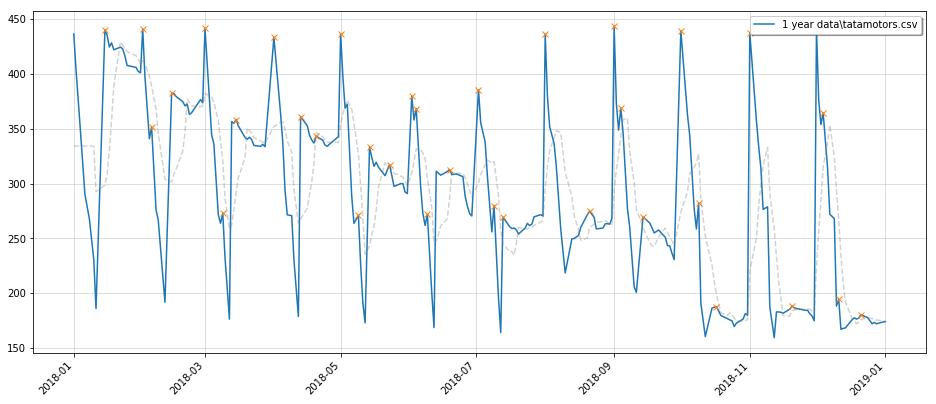


High points dates:
 Date
2018-01-15    440.05
2018-02-01    440.85
2018-02-05    351.65
2018-02-14    382.30
2018-03-01    441.40
2018-03-09    273.00
2018-03-15    358.40
2018-04-01    433.30
2018-04-13    361.00
2018-04-20    343.25
2018-05-01    436.35
2018-05-09    271.00
2018-05-14    333.00
2018-05-23    317.25
2018-06-02    379.85
2018-06-04    368.35
2018-06-09    272.00
2018-06-19    312.80
2018-07-02    385.40
2018-07-09    279.90
2018-07-13    269.40
2018-08-01    436.20
2018-08-21    274.70
2018-09-01    443.50
2018-09-04    368.60
2018-09-14    269.60
2018-10-01    439.30
2018-10-09    282.00
2018-10-17    187.80
2018-11-01    437.60
2018-11-20    188.30
2018-12-01    441.45
2018-12-04    364.40
2018-12-11    194.45
2018-12-21    180.50
dtype: float64


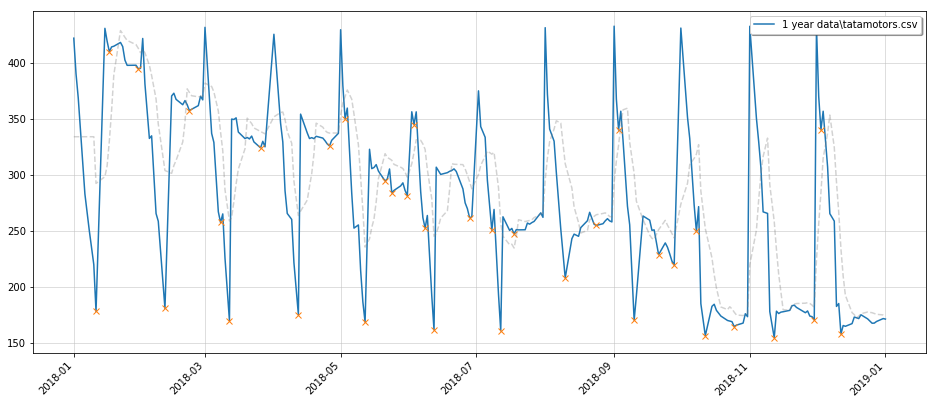


Low points dates:
 Date
2018-01-15    431.05
2018-02-01    422.00
2018-02-05    335.00
2018-02-14    370.60
2018-03-01    431.95
2018-03-09    265.25
2018-03-15    351.10
2018-04-01    425.75
2018-04-13    354.40
2018-04-20    334.60
2018-05-01    429.80
2018-05-09    255.40
2018-05-14    323.00
2018-05-23    305.40
2018-06-02    356.50
2018-06-04    356.45
2018-06-09    263.85
2018-06-19    303.30
2018-07-02    375.20
2018-07-09    269.25
2018-07-13    262.70
2018-08-01    431.65
2018-08-21    266.70
2018-09-01    433.00
2018-09-04    357.00
2018-09-14    263.40
2018-10-01    431.30
2018-10-09    271.75
2018-10-17    179.10
2018-11-01    432.90
2018-11-20    183.20
2018-12-01    432.10
2018-12-04    357.00
2018-12-11    185.20
2018-12-21    175.15
dtype: float64


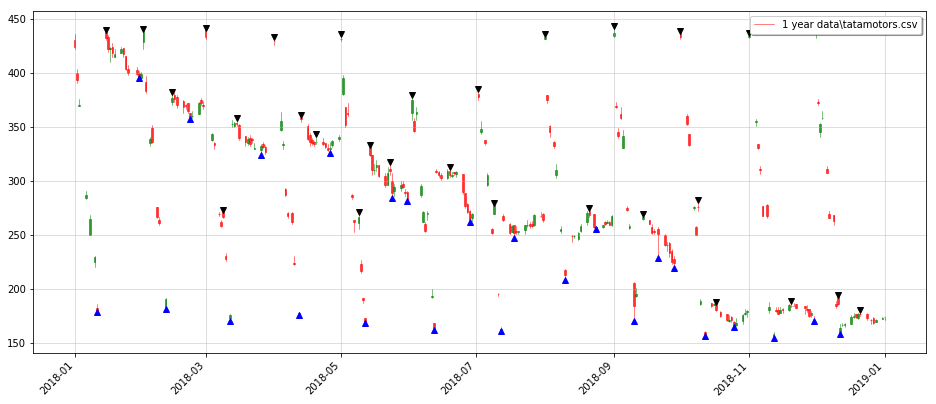

None
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      430.95      436.40     422.25       424.45    0.000000   
2018-01-02      399.90      403.80     390.55       393.65    0.000000   
2018-01-03      369.75      376.30     369.05       370.75    0.000000   
2018-01-06      284.50      290.35     283.05       287.20    0.000000   
2018-01-08      250.00      268.00     250.00       265.05    0.000000   
2018-01-10      225.00      230.45     220.00       229.35    0.000000   
2018-01-11      182.00      186.05     178.20       179.45    0.000000   
2018-01-15      438.05      440.05     431.05       432.35    0.000000   
2018-01-16      433.00      435.20     419.50       421.90    0.066568   
2018-01-17      422.05      424.50     410.10       422.95    0.066568   
2018-01-18      424.00      428.30     414.45       418.95    0.066568   
2018-01-19      415.20      421.9


higer high data:
            related high date    high_type
Date                                     
2018-03-01        2018-02-14  higher_high
2018-03-13        2018-03-09  higher_high

lower low data:
            related low date   low_type  resistance  resistance_dilution
Date                                                                   
2018-03-12       2018-01-11  lower_low      176.45                  173
2018-02-02       2018-01-30  lower_low      397.40                    8
2018-03-12       2018-02-11  lower_low      176.45                  173
2018-03-04       2018-02-22  lower_low      344.50                   29
2018-05-12       2018-03-12  lower_low      173.00                  142
2018-04-06       2018-03-26  lower_low      293.85                   65
2018-05-12       2018-04-12  lower_low      173.00                  142
2018-05-06       2018-04-26  lower_low      288.25                   52
2018-06-12       2018-05-12  lower_low      168.70                  128
201

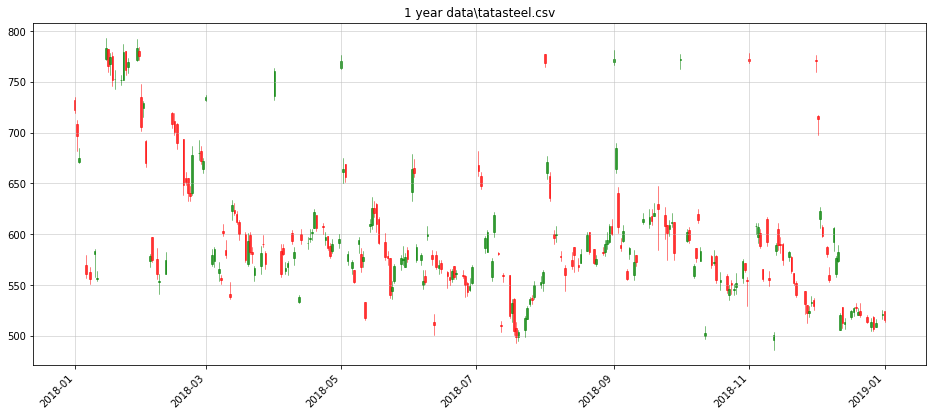

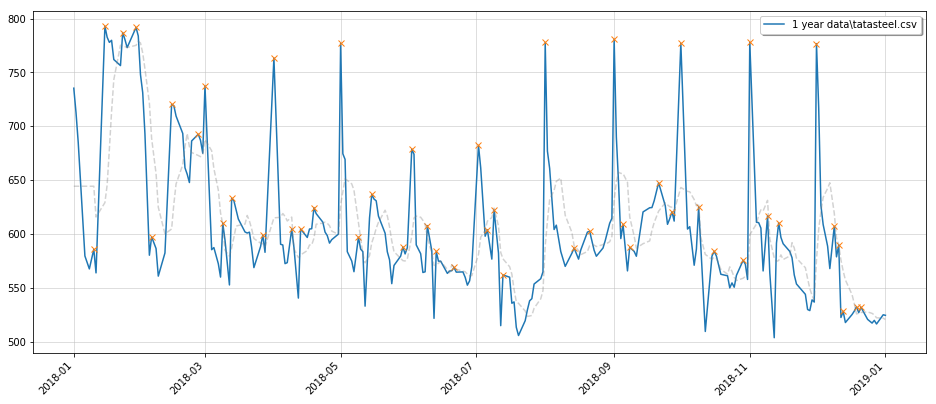


High points dates:
 Date
2018-01-10    585.80
2018-01-15    793.00
2018-01-23    787.10
2018-01-29    791.80
2018-02-05    597.40
2018-02-14    720.50
2018-02-26    692.65
2018-03-01    737.50
2018-03-09    609.95
2018-03-13    633.20
2018-03-27    599.00
2018-04-01    763.45
2018-04-09    604.50
2018-04-13    604.70
2018-04-19    624.50
2018-05-01    776.90
2018-05-09    597.00
2018-05-15    636.80
2018-05-29    588.00
2018-06-02    679.00
2018-06-09    607.80
2018-06-13    583.80
2018-06-21    568.95
2018-07-02    682.20
2018-07-06    603.90
2018-07-09    622.00
2018-07-13    562.00
2018-08-01    777.85
2018-08-14    587.00
2018-08-21    602.45
2018-09-01    780.85
2018-09-05    608.85
2018-09-08    587.70
2018-09-21    647.60
2018-09-27    620.75
2018-10-01    777.00
2018-10-09    625.00
2018-10-16    584.00
2018-10-29    575.50
2018-11-01    777.90
2018-11-09    617.00
2018-11-14    610.60
2018-12-01    776.80
2018-12-09    607.20
2018-12-11    589.70
2018-12-13    528.05
2018-12-

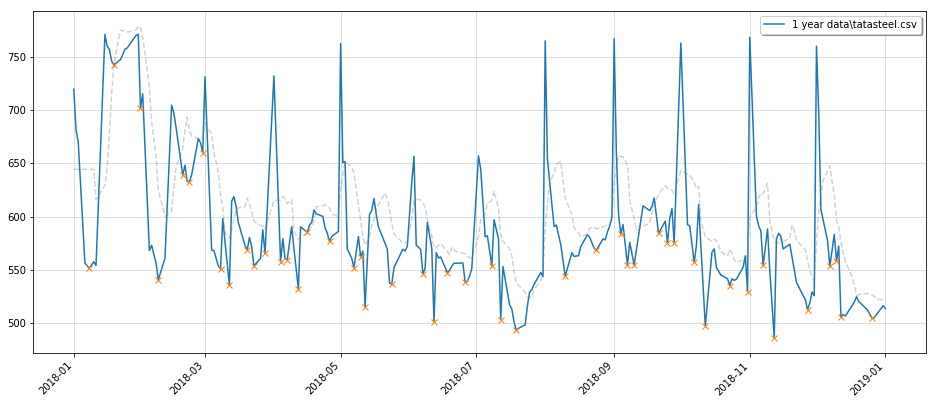


Low points dates:
 Date
2018-01-10    557.50
2018-01-15    771.00
2018-01-23    752.00
2018-01-29    770.15
2018-02-05    572.95
2018-02-14    704.55
2018-02-26    673.20
2018-03-01    731.25
2018-03-09    598.00
2018-03-13    614.35
2018-03-27    587.55
2018-04-01    732.00
2018-04-09    590.60
2018-04-13    590.40
2018-04-19    606.05
2018-05-01    762.50
2018-05-09    581.20
2018-05-15    605.50
2018-05-29    569.35
2018-06-02    632.55
2018-06-09    594.50
2018-06-13    566.00
2018-06-21    556.10
2018-07-02    657.00
2018-07-06    581.90
2018-07-09    597.05
2018-07-13    553.00
2018-08-01    765.00
2018-08-14    562.55
2018-08-21    580.55
2018-09-01    767.00
2018-09-05    592.55
2018-09-08    575.80
2018-09-21    584.30
2018-09-27    607.40
2018-10-01    762.90
2018-10-09    611.25
2018-10-16    569.60
2018-10-29    552.30
2018-11-01    768.35
2018-11-09    588.35
2018-11-14    584.30
2018-12-01    760.05
2018-12-09    583.10
2018-12-11    572.15
2018-12-13    508.00
2018-12-1

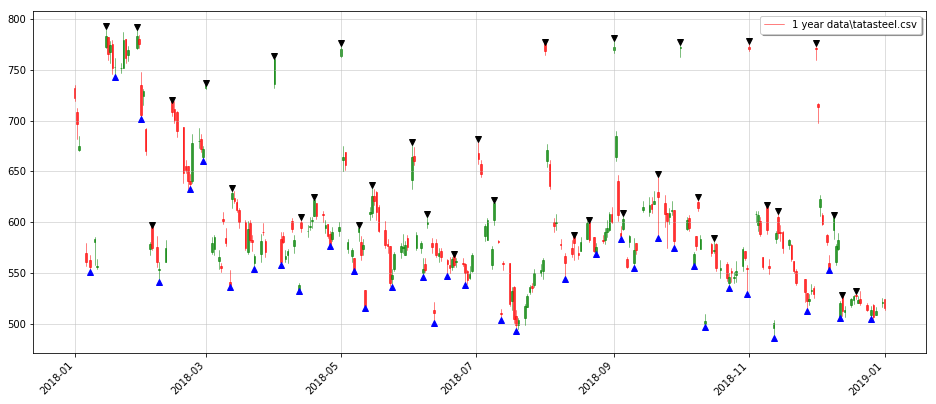

None
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      732.50      735.40     719.50       722.20    0.000000   
2018-01-02      708.00      712.75     681.60       696.75    0.000000   
2018-01-03      671.35      685.00     670.05       675.05    0.000000   
2018-01-06      570.00      579.60     556.30       560.65    0.000000   
2018-01-08      562.85      567.60     551.30       555.80    0.000000   
2018-01-10      580.00      585.80     557.50       583.20    0.000000   
2018-01-11      555.80      563.90     554.00       556.60    0.000000   
2018-01-15      772.00      793.00     771.00       783.50    0.000000   
2018-01-16      782.75      782.75     760.10       765.75   -0.132552   
2018-01-17      768.00      777.95     757.00       774.00   -0.132552   
2018-01-18      775.00      779.85     746.20       751.75   -0.132552   
2018-01-19      752.50      762.0


higer high data:
            related high date    high_type
Date                                     
2018-02-14        2018-02-05  higher_high
2018-03-01        2018-02-14  higher_high

lower low data:
            related low date   low_type  resistance  resistance_dilution
Date                                                                   
2018-03-12       2018-01-08  lower_low      552.70                  155
2018-01-31       2018-01-19  lower_low      747.90                    7
2018-02-02       2018-01-31  lower_low      693.00                   11
2018-03-12       2018-02-08  lower_low      552.70                  155
2018-03-04       2018-02-22  lower_low      585.45                   80
2018-03-04       2018-02-28  lower_low      585.45                   80
2018-05-12       2018-03-12  lower_low      533.00                  131
2018-04-12       2018-03-23  lower_low      540.50                  147
2018-04-12       2018-04-04  lower_low      540.50                  147
201

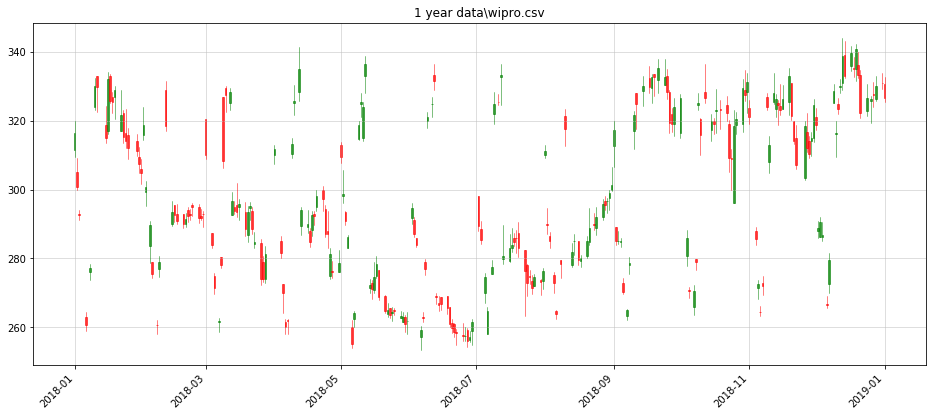

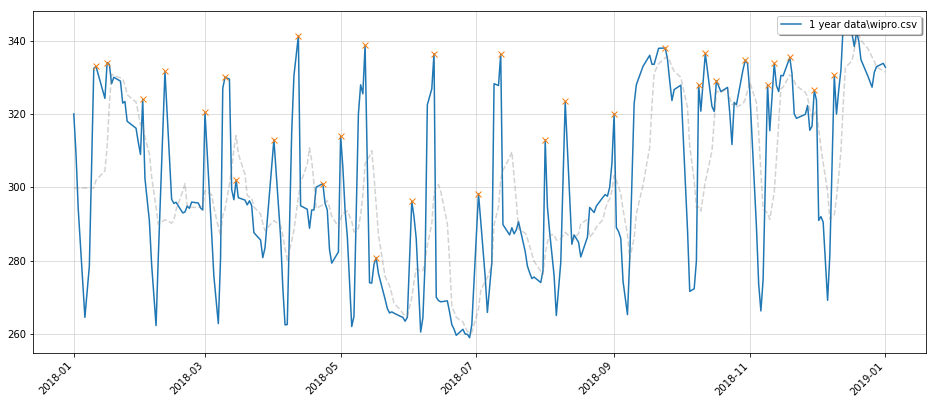


High points dates:
 Date
2018-01-11    332.95
2018-01-16    334.00
2018-02-01    324.00
2018-02-11    331.60
2018-03-01    320.40
2018-03-10    330.00
2018-03-15    302.00
2018-04-01    313.00
2018-04-12    341.25
2018-04-23    301.00
2018-05-01    313.90
2018-05-12    338.70
2018-05-17    280.80
2018-06-02    296.15
2018-06-12    336.45
2018-07-02    298.20
2018-07-12    336.35
2018-08-01    312.90
2018-08-10    323.40
2018-09-01    320.00
2018-09-24    338.00
2018-10-09    328.00
2018-10-12    336.50
2018-10-17    329.10
2018-10-30    334.65
2018-11-09    328.00
2018-11-12    333.80
2018-11-19    335.40
2018-11-30    326.40
2018-12-09    330.50
2018-12-13    343.95
dtype: float64


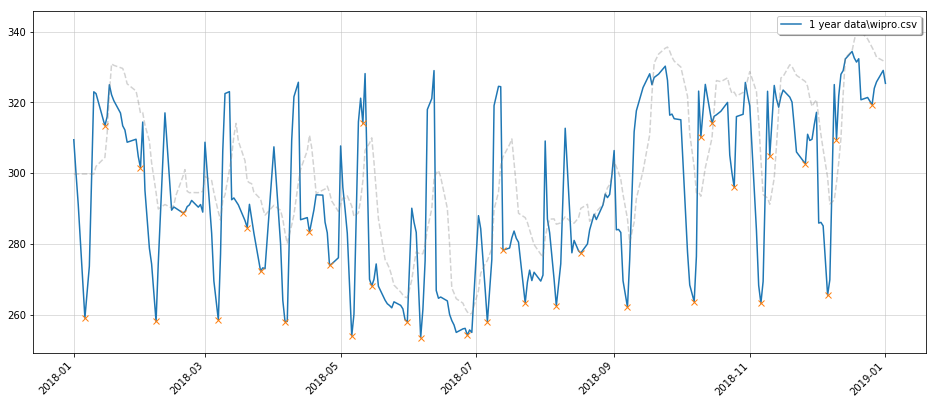


Low points dates:
 Date
2018-01-11    322.50
2018-01-16    316.00
2018-02-01    314.45
2018-02-11    317.05
2018-03-01    308.75
2018-03-10    322.50
2018-03-15    292.00
2018-04-01    307.45
2018-04-12    325.70
2018-04-23    293.80
2018-05-01    307.70
2018-05-12    328.15
2018-05-17    274.35
2018-06-02    290.10
2018-06-12    329.00
2018-07-02    288.00
2018-07-12    324.45
2018-08-01    309.10
2018-08-10    312.70
2018-09-01    306.40
2018-09-24    330.25
2018-10-09    323.20
2018-10-12    325.10
2018-10-17    316.50
2018-10-30    325.65
2018-11-09    323.15
2018-11-12    324.80
2018-11-19    321.50
2018-11-30    313.70
2018-12-09    325.05
2018-12-13    329.00
dtype: float64


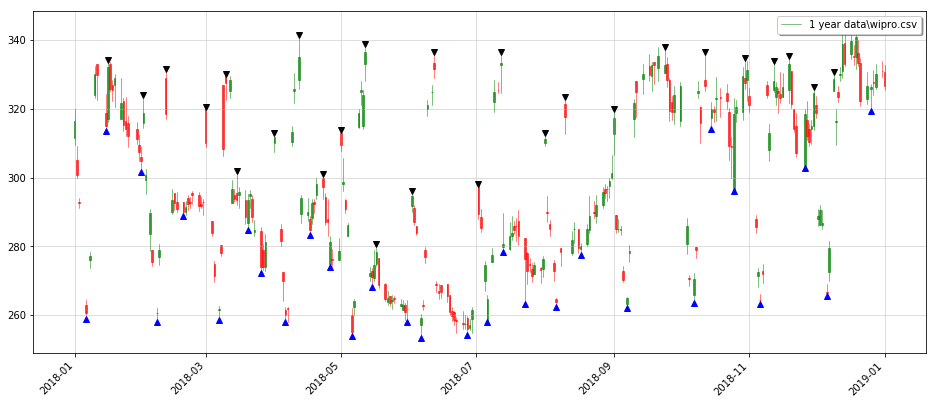

None
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      311.50      320.00     309.45       316.55    0.000000   
2018-01-02      305.05      309.10     300.00       300.75    0.000000   
2018-01-03      292.80      294.10     291.20       292.50    0.000000   
2018-01-06      262.95      264.50     259.05       260.60    0.000000   
2018-01-08      276.00      278.50     273.70       277.35    0.000000   
2018-01-10      324.00      332.45     323.00       330.15    0.000000   
2018-01-11      332.95      332.95     322.50       329.65    0.000000   
2018-01-15      318.85      324.25     313.40       315.00    0.000000   
2018-01-16      316.90      334.00     316.00       331.95    0.000000   
2018-01-17      333.00      333.50     325.00       325.70   -0.737815   
2018-01-18      327.00      328.25     322.15       325.35   -0.737815   
2018-01-19      327.00      330.0


higer high data:
            related high date    high_type
Date                                     
2018-04-12        2018-01-16  higher_high
2018-03-10        2018-02-01  higher_high

lower low data:
            related low date   low_type  resistance  resistance_dilution
Date                                                                   
2018-05-06       2018-01-06  lower_low      262.00                  153
2018-01-25       2018-01-15  lower_low      318.00                   69
2018-02-02       2018-01-31  lower_low      302.45                   86
2018-05-06       2018-02-07  lower_low      262.00                  153
2018-03-04       2018-02-19  lower_low      287.35                  113
2018-05-06       2018-03-07  lower_low      262.00                  153
2018-03-26       2018-03-20  lower_low      285.60                  110
2018-04-05       2018-03-26  lower_low      272.65                  145
2018-05-06       2018-04-06  lower_low      262.00                  153
201

In [22]:
ppdf=p.PdfPages('trend_generator.pdf')
for STOCK_PRICE_FILE in glob.glob("1 year data/*.csv"):
    data = read_data(STOCK_PRICE_FILE)
    recent_data = data.iloc[-50:,:].copy()
    sample_data = data.loc[datetime.date(year=2018,month=3,day=18):datetime.date(year=2018,month=5,day=4)]
    sample_data = data.iloc[-300:,:].copy()
    fig, ax = plt.subplots(figsize = (16,7))
    fig.subplots_adjust(bottom=0.2)

    quotes = zip(mdates.date2num(sample_data.index.to_pydatetime()),sample_data[u'Open Price'], 
                             sample_data[u'High Price'],sample_data[u'Low Price'], sample_data[u'Close Price'])
    candlestick_ohlc(ax,quotes,width=0.75,colorup='g',colordown='red',alpha=0.6)
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    print("\nfile running:\n",STOCK_PRICE_FILE)
    plt.title(STOCK_PRICE_FILE)
    plt.rc('axes', grid=True)
    plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)
    plt.show()
    #------------Interest points---------------------------------------------
    # Find High Points
    high_price_seq = sample_data['High Price'].values
    ma = pd.Series(high_price_seq,index=sample_data.index).rolling(window=6).mean().fillna(method='bfill')
    height_of_peak = (ma*0.005).values
    peaks,peaks_properties = find_peaks(high_price_seq,distance=1,prominence=5)
    fig, ax = plt.subplots(figsize = (16,7))
    fig.subplots_adjust(bottom=0.2)

    plt.plot(pd.Series(high_price_seq,index=sample_data.index))
    plt.plot(sample_data.index[peaks], pd.Series(high_price_seq,index=sample_data.index)[peaks], "x")

    plt.plot(ma, "--", color="gray", alpha=0.35)

    ax.xaxis_date()
    ax.legend([STOCK_PRICE_FILE],loc='upper right', shadow=True, fancybox=True)
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

    plt.rc('axes', grid=True)
    plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)
    plt.show()
    print("\nHigh points dates:\n",pd.Series(high_price_seq,index=sample_data.index)[peaks])
    #LOW POINTS
    low_price_seq = sample_data['Low Price'].values
    low_price_seq_inv = sample_data['Low Price'].values*-1
    ma_inv = pd.Series(low_price_seq_inv,index=sample_data.index).rolling(window=6).mean().fillna(method='bfill')
    depth_of_trough = (ma_inv*0.005).values
    troughs,troughs_properties = find_peaks(low_price_seq_inv,distance=1,prominence=5)
    
    fig, ax = plt.subplots(figsize = (16,7))
    fig.subplots_adjust(bottom=0.2)

    plt.plot(pd.Series(low_price_seq,index=sample_data.index))
    plt.plot(sample_data.index[troughs], pd.Series(low_price_seq,index=sample_data.index)[troughs], "x")

    plt.plot(ma, "--", color="gray", alpha=0.35)

    ax.xaxis_date()
    ax.legend([STOCK_PRICE_FILE],loc='upper right', shadow=True, fancybox=True)
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

    plt.rc('axes', grid=True)
    plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)
    plt.show()
    
    print("\nLow points dates:\n",pd.Series(low_price_seq,index=sample_data.index)[peaks])
    #---------------bullish trend reversal ----------------------------------------
    peak_indices = vasu.get_peak_indices(sample_data)
    trough_indices = vasu.get_trough_indices(sample_data)
    print(vasu.plot_candlestic_with_extrema(sample_data,peak_indices,trough_indices,STOCK_PRICE_FILE))
    #------------------------------------------------------------------------------------------
    momemtum_high_data = get_momentum_high_df(sample_data)
    momentum_low_data = get_momentum_low_df(sample_data)
    
    #--------------- Trend---------------------------------------
    trend_data = vasu.get_trend_data(sample_data)
    train_data,test_data = vasu.split_data(trend_data)
    print("\ntrain data:\n",train_data)
    print("\ntest data:\n",test_data)
    print("\ntrend:\n",vasu.get_ma_slope(sample_data['Close Price'],ma_period=20,slope_period=8))
    
    #--------------------------higher high and lower low---------------------------------
    higher_high_index = []
    related_high_dates = []

    for momentum_high_ts in momemtum_high_data.index:
        high_price = sample_data[u'High Price'].loc[momentum_high_ts]
        select_data = sample_data.loc[momentum_high_ts:]
        higher_high_data = select_data[select_data[u'Close Price'] > high_price][0:1]
        if len(higher_high_data) > 0:
            higher_high_index.append(higher_high_data.index[0])
            related_high_dates.append(momentum_high_ts)
    
    higher_high_data = pd.DataFrame(data=related_high_dates, index=higher_high_index,columns=['related high date'])
    higher_high_data.index.name = 'Date'
    higher_high_data['high_type'] = 'higher_high'
    
    print('\nhiger high data:\n',higher_high_data[:2])
    
    lower_low_index = []
    related_low_dates = []

    for momentum_low_ts in momentum_low_data.index:
        low_price = sample_data[u'Low Price'].loc[momentum_low_ts]
        select_data = sample_data.loc[momentum_low_ts:]
        lower_low_data = select_data[select_data[u'Close Price'] < low_price][0:1]
        if len(lower_low_data) > 0:
            lower_low_index.append(lower_low_data.index[0])
            related_low_dates.append(momentum_low_ts)
    lower_low_data = pd.DataFrame(data=related_low_dates, index=lower_low_index,columns=['related low date'])
    lower_low_data.index.name = 'Date'
    lower_low_data['low_type'] = 'lower_low'
    
    #--------support and resistance-------------------
    resistance_prices = []
    resistance_dilution = []
    for lower_low_ts in lower_low_data.index:
        resistance_price = sample_data[u'High Price'].loc[lower_low_ts]
        resistance_prices.append(resistance_price)
        lower_low_swing_data = sample_data[lower_low_ts:][1:]
        resistance_dilution.append(len(lower_low_swing_data[lower_low_swing_data['Close Price'] > resistance_price]))
    
    lower_low_data['resistance'] = resistance_prices
    lower_low_data['resistance_dilution'] = resistance_dilution
    
    #Printing lower low data
    print('\nlower low data:\n',lower_low_data)
    
    support_prices = []
    support_violation = []
    for higher_high_ts in higher_high_data.index:
        support_price = sample_data[u'Low Price'].loc[higher_high_ts]
        support_prices.append(support_price)
        higher_high_swing_data = sample_data[higher_high_ts:][1:]
        support_violation.append(len(higher_high_swing_data[higher_high_swing_data['Close Price'] < support_price]))
    
    higher_high_data['support'] = support_prices
    higher_high_data['support_violation'] = support_violation
    
    #--------special candle-------------------------------
    hammer_data = sample_data[sample_data.apply(is_hammer,axis=1)].copy()
    hammer_data['candle type'] = 'bullish pinbar'
    
    invese_hammer_data = sample_data[sample_data.apply(is_inverse_hammer,axis=1)].copy()
    invese_hammer_data['candle type'] = 'bearish pinbar'
    
    pinbar_data = pd.concat([hammer_data,invese_hammer_data]).sort_index()
    
    ### Bullish Engulfing
    bullish_engulfing_list = []
    for ts, row in sample_data[:-1].iterrows():
        #first candle is negative
        if row[u'Close Price'] < row[u'Open Price']:
            #print(ts)
            next_open = sample_data[ts:][1:2][u'Open Price'].values[0]
            next_close = sample_data[ts:][1:2][u'Close Price'].values[0]
            next_high = sample_data[ts:][1:2][u'High Price'].values[0]
            next_low = sample_data[ts:][1:2][u'Low Price'].values[0]
            next_ts = sample_data[ts:][1:2].index.values[0]
            #second candle is positive
            if next_close > next_open:
                if next_close > row[u'Open Price'] and next_open < row[u'Close Price']:
                    if next_high > row[u'High Price'] and next_low < row[u'Low Price']:
                        bullish_engulfing_list.append(sample_data[ts:][1:2].copy())
                    
    if len(bullish_engulfing_list) > 0:
        bullish_engulfing_data = pd.concat(bullish_engulfing_list) 
    else:
        bullish_engulfing_data = pd.DataFrame()
    
    bullish_engulfing_data['candle type'] = 'bullish engulfing'
    
    ### bearish Engulfing
    bearish_engulfing_list = []
    for ts, row in sample_data[:-1].iterrows():
        #first candle is positive
        if row[u'Close Price'] > row[u'Open Price']:
            next_open = sample_data[ts:][1:2][u'Open Price'].values[0]
            next_close = sample_data[ts:][1:2][u'Close Price'].values[0]
            next_high = sample_data[ts:][1:2][u'High Price'].values[0]
            next_low = sample_data[ts:][1:2][u'Low Price'].values[0]
            next_ts = sample_data[ts:][1:2].index.values[0]
            #second candle is negative
            if next_close < next_open:
                if next_close < row[u'Open Price'] and next_open > row[u'Close Price']:
                    if next_high > row[u'High Price'] and next_low < row[u'Low Price']:
                        bearish_engulfing_list.append(sample_data[ts:][1:2].copy())

    if len(bearish_engulfing_list) > 0:
        bearish_engulfing_data = pd.concat(bearish_engulfing_list)
    else:
        bearish_engulfing_data = pd.DataFrame()
    
    bearish_engulfing_data 
    bearish_engulfing_data['candle type'] = 'bearish engulfing'
    
    engulfing_data = pd.concat([bearish_engulfing_data,bullish_engulfing_data]).sort_index()
    
    #------------------ALL events-----------------------------------------
    
    last_trend = trend_data[trend_data['trend'] != 'indeterminate']['trend'].tail(1).values[0]
    last_ma_trend = vasu.get_ma_slope(sample_data[u'Close Price'],ma_period=20,slope_period=8)
    print('stock trend is : %s and moving averages are trend is : %f'%(last_trend,last_ma_trend))
    
    event_data = []
    signal_start_date = datetime.datetime(year=2018,month=12,day=15)
    signal_end_date = datetime.datetime.now()
    
    #highs and lows
    momentum_high_select_data = momemtum_high_data.reset_index()[momemtum_high_data.reset_index()['Date'] > signal_start_date].set_index('Date')
    for ts,row in momentum_high_select_data.iterrows():
        event_dict = {'event_ts' : ts, 'event_type' : row['high_type']}
        event_data.append(event_dict)

    momentum_low_select_data = momentum_low_data.reset_index()[momentum_low_data.reset_index()['Date'] > signal_start_date].set_index('Date')
    for ts,row in momentum_low_select_data.iterrows():
        event_dict = {'event_ts' : ts, 'event_type' : row['low_type']}
        event_data.append(event_dict)
    
   #higher highs and lower lows
    higher_high_select_data = higher_high_data.reset_index()[higher_high_data.reset_index()['Date'] > signal_start_date].set_index('Date')
    for ts,row in higher_high_select_data.iterrows():
        event_dict = {'event_ts' : ts, 'event_type' : row['high_type'], 
                  'related_high_date' : row['related high date'], 'support' : row['support']}
        event_data.append(event_dict)
    
    lower_low_select_data = lower_low_data.reset_index()[lower_low_data.reset_index()['Date'] > signal_start_date].set_index('Date')
    for ts,row in lower_low_select_data.iterrows():
        event_dict = {'event_ts' : ts, 'event_type' : row['low_type'], 
                  'related_low_date' : row['related low date'], 'resistance' : row['resistance']}
        event_data.append(event_dict)
    
    #special candles
    hammer_select_data = hammer_data.reset_index()[hammer_data.reset_index()['Date'] > signal_start_date].set_index('Date')
    for ts,row in hammer_select_data.iterrows():
        event_dict = {'event_ts' : ts, 'event_type' : 'special candle', 'candle type' : 'pinbar'}
        event_data.append(event_dict)
    
    '''engulfing_select_data = engulfing_data.reset_index()[engulfing_data.reset_index()['Date'] > signal_start_date].set_index('Date')
    for ts,row in engulfing_select_data.iterrows():
        event_dict = {'event_ts' : ts, 'event_type' : 'special candle', 'candle type' : row['candle type']}
        event_data.append(event_dict)'''
    
    pinbar_select_data = pinbar_data.reset_index()[pinbar_data.reset_index()['Date'] > signal_start_date].set_index('Date')
    for ts,row in pinbar_select_data.iterrows():
        event_dict = {'event_ts' : ts, 'event_type' : 'special candle', 'candle type' : row['candle type']}
        event_data.append(event_dict)
    print('events happened:\n',pd.DataFrame(event_data))
    
    #-----------------Bullish continuation-----------------------------------
    # find latest lower low after scan date
    lower_low_select_data = lower_low_data.reset_index()[lower_low_data.reset_index()['Date'] > signal_start_date].set_index('Date')
    if len(lower_low_select_data) > 0:
        benchmark_date = lower_low_select_data[-1:].index.values[0]
        trade_window_data = sample_data.loc[benchmark_date:]
        benchmark_price = trend_data.loc[benchmark_date]['High Price']
        benchmark_trend = trend_data.loc[benchmark_date]['trend']
        benchmark_ma_trend = vasu.get_ma_slope(sample_data.loc[:benchmark_date][u'Close Price'],ma_period=20,slope_period=8)

        if benchmark_trend == 'bullish' and benchmark_ma_trend > 0.2:
            print('trend is bullish!')
            buy_signal_date = trade_window_data[trade_window_data['Close Price'] > benchmark_price][:1].index.values[0]
            print('buy signal at %s' % buy_signal_date)  
            stop_loss = trade_window_data.loc[buy_signal_date]['Low Price'] - 0.1
            buy_price = trade_window_data.loc[buy_signal_date]['High Price']*1.003
            risk = buy_price - stop_loss
            resistance_data = lower_low_data[lower_low_data['resistance_dilution'] < 1]['resistance'].sort_values()
            resistance_data['risk_reward'] = (resistance_data - buy_price)/risk
            print(resistance_data['risk_reward'])
 

    #-----------------------Bullish riversal----------------------------------
    # find latest lower low after scan date
    higher_high_select_data = higher_high_data.reset_index()[higher_high_data.reset_index()['Date'] > signal_start_date].set_index('Date')
    if len(higher_high_select_data) > 0:
        benchmark_date = higher_high_select_data[-1:].index.values[0]
        trade_window_data = sample_data.loc[benchmark_date:]
        benchmark_price = trend_data.loc[benchmark_date]['Low Price']
        benchmark_trend = trend_data.loc[benchmark_date]['trend']
        benchmark_ma_trend = vasu.get_ma_slope(sample_data.loc[:benchmark_date][u'Close Price'],ma_period=20,slope_period=8)

        if benchmark_trend == 'bullish' and benchmark_ma_trend > 0.2:
            print('trend is bullish!')
            first_sign_date = trade_window_data[trade_window_data['Close Price'] < benchmark_price][:1].index.values[0]
            first_sign_data = trade_window_data.loc[first_sign_date:][1:]
            second_sign_date = first_sign_data[first_sign_data['Close Price'] > benchmark_price][:1].index.values[0]
            second_sign_data = trade_window_data.loc[second_sign_date:][1:]
            sell_signal_date = second_sign_data[second_sign_data['Close Price'] < benchmark_price][:1].index.values[0]
            print('sell signal at %s' % sell_signal_date)  
        
            stop_loss = trade_window_data.loc[sell_signal_date]['High Price'] + 0.1
            sell_price = trade_window_data.loc[sell_signal_date]['Low Price']*0.997
            risk = stop_loss - sell_price
            support_data = higher_high_data[higher_high_data['support_violation'] < 1]['support'].sort_values()
            support_data['risk_reward'] = (sell_price - support_data)/risk
            print(support_data['risk_reward'])
    
    
    print("---------------------------------------------------next data-----------------------------------------------------------")
    ppdf.savefig(fig)
    plt.close()
ppdf.close()
    